**Problem 1 - Q2. Implementing Genetic Algorithm with Selection Only**

In [1]:
import numpy as np
import pandas as pd

def initpop(config, seed = None):
    if seed is not None:
        np.random.seed(seed)
    with open(config, 'r') as f:
        lines = f.readlines()
    if '=' in lines[0]:
        for line in lines:
            line = line.strip()
            if line.startswith("popsize"):
                pop = int(line.split('=')[1].strip())
            elif line.startswith("numitems"):
                n = int(line.split('=')[1].strip())
            elif line.startswith("maxgen"):
                stop = int(line.split('=')[1].strip())
            elif line.startswith("totweight"):
                W = int(line.split('=')[1].strip())
            elif line.startswith("Svalues"):
                continue
            elif line:
                weight, val = map(int, line.split())
                S.append((weight, val))
    else:
        pop, n, stop, W = map(int, [lines[i].strip() for i in range(4)])
        S = [tuple(map(int, line.strip().split())) for line in lines[4:]]
    g = 0
    p = np.random.randint(2, size = (pop, n))
    return p, W, S, g, stop

In [2]:
def fitness(chromo, S, W):
    totweight = 0
    totval = 0
    for i, gene in enumerate(chromo):
        totweight += gene * S[i][0]
        totval += gene * S[i][1]
    if totweight > W:
        return 0
    return totval

def roulette(pop, fit):
    totfit = sum(fit)
    if totfit == 0:
        selected = np.random.choice(len(pop), size=2)
    else:
        prob = [f / totfit for f in fit]
        selected = np.random.choice(len(pop), size=2, p=prob)
    return pop[selected[0]], pop[selected[1]]

def tournament(pop, fit, size=3):
    selected = []
    for _ in range(2):
        parents = np.random.choice(len(pop), size, replace=False)
        best = max(parents, key=lambda i: fit[i])
        selected.append(pop[best])
    return selected[0], selected[1]

In [3]:
import matplotlib.pyplot as plt
def genalgo(config, criteria='roulette'):
    p, W, S, g, stop = initpop(config, seed=5342)
    n = len(S)
    avgfit = []
    fittest = []
    actgenes = []
    bestfit = -float('inf')
    bestsol = None
    bestgen = 0

    for gen in range(stop):
        fitval = [fitness(i, S, W) for i in p]
        avgfitness = np.mean(fitval)
        avgfit.append(avgfitness)
        fitsol = p[np.argmax(fitval)]
        f = fitval[np.argmax(fitval)]
        actgen = np.sum(fitsol)
        fittest.append(f)
        actgenes.append(actgen)
        newpop = []
        for _ in range(n // 2):
            if criteria == 'roulette':
                p1, p2 = roulette(p, fitval)
            else:
                p1, p2 = tournament(p, fitval)
            newpop.append(p1)
            newpop.append(p2)
        p = np.array(newpop)
        if f > bestfit:
            bestfit = f
            bestsol = fitsol
            bestgen = gen
    fitPstop = [fitness(i, S, W) for i in p]
    avgfitPstop = np.mean(fitPstop)
    fitsolPstop = p[np.argmax(fitPstop)]
    fPstop = fitPstop[np.argmax(fitPstop)]
    actgenesPstop = np.sum(fitsolPstop)
    print(bestsol)
    totweight = sum([S[i][0] * gene for i, gene in enumerate(bestsol)])
    print(totweight)
    return (avgfit, fittest, actgenes, avgfitPstop, fPstop, actgenesPstop, bestsol, bestfit, bestgen)

def display(rdata, tdata):
    gen = range(0, len(rdata[0]))

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(gen, rdata[0], label="Roulette Avg Fitness", color='b', marker="o")
    plt.plot(gen, tdata[0], label="Tournament Avg Fitness", color='r', marker="o")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.title(f"Average Fitness Over Generations (Pstop): {rdata[4]} , {tdata[4]}")
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(gen, rdata[1], label="Roulette Fittest Fitness", color='b', marker="x")
    plt.plot(gen, tdata[1], label="Tournament Fittest Fitness", color='r', marker="x")
    plt.plot(gen, rdata[2], label="Roulette Active Genes", color='b', linestyle='dashed')
    plt.plot(gen, tdata[2], label="Tournament Active Genes", color='r', linestyle='dashed')
    plt.xlabel("Generation")
    plt.ylabel("Value")
    plt.title(f"Fittest Individual Fitness and Active Genes in Pstop: {rdata[3]} , {tdata[3]}, {rdata[5]} , {tdata[5]}")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

def compare(config):
    rdata = genalgo(config, criteria='roulette')
    tdata = genalgo(config, criteria='tournament')
    display(rdata, tdata)
    
    print(f"Best Overall Solution (Roulette): Fitness = {rdata[7]}, Generation = {rdata[8]}")
    print(f"Best Overall Solution (Tournament): Fitness = {tdata[7]}, Generation = {tdata[8]}")


[1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0
 0 0 1 0 1 0 1 0 0 1 0 0 0]
684
[1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0
 0 0 1 0 1 0 1 0 0 1 0 0 0]
684


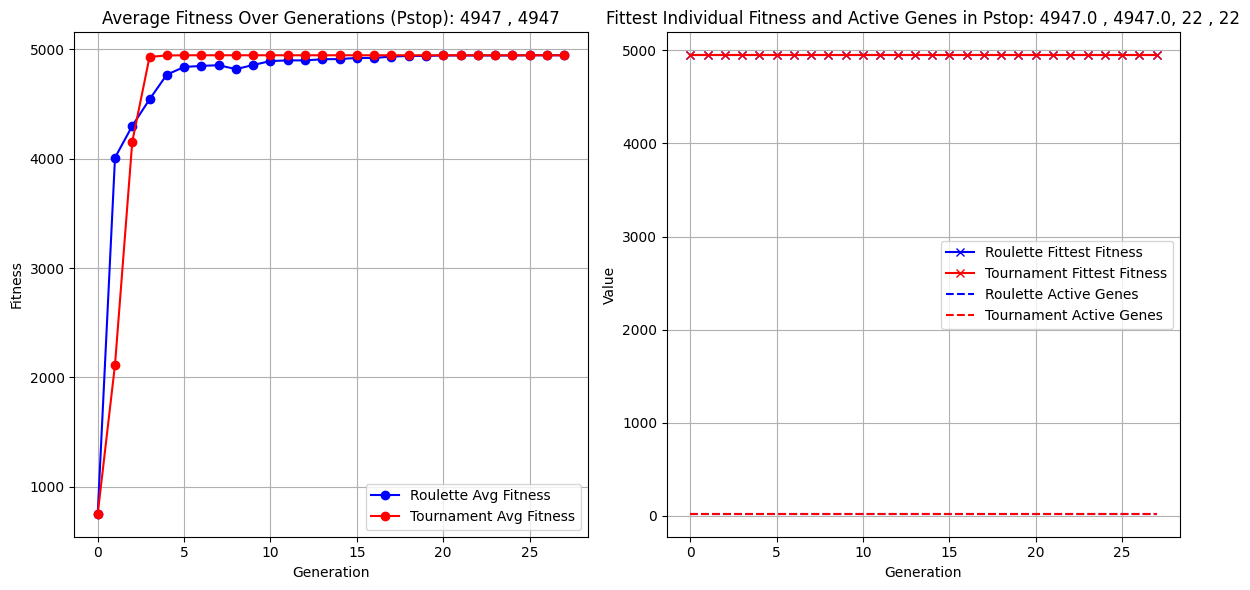

Best Overall Solution (Roulette): Fitness = 4947, Generation = 0
Best Overall Solution (Tournament): Fitness = 4947, Generation = 0
[1 0 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 0
 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0
 1 1 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0]
22728
[1 0 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 0
 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0
 1 1 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0]
22728


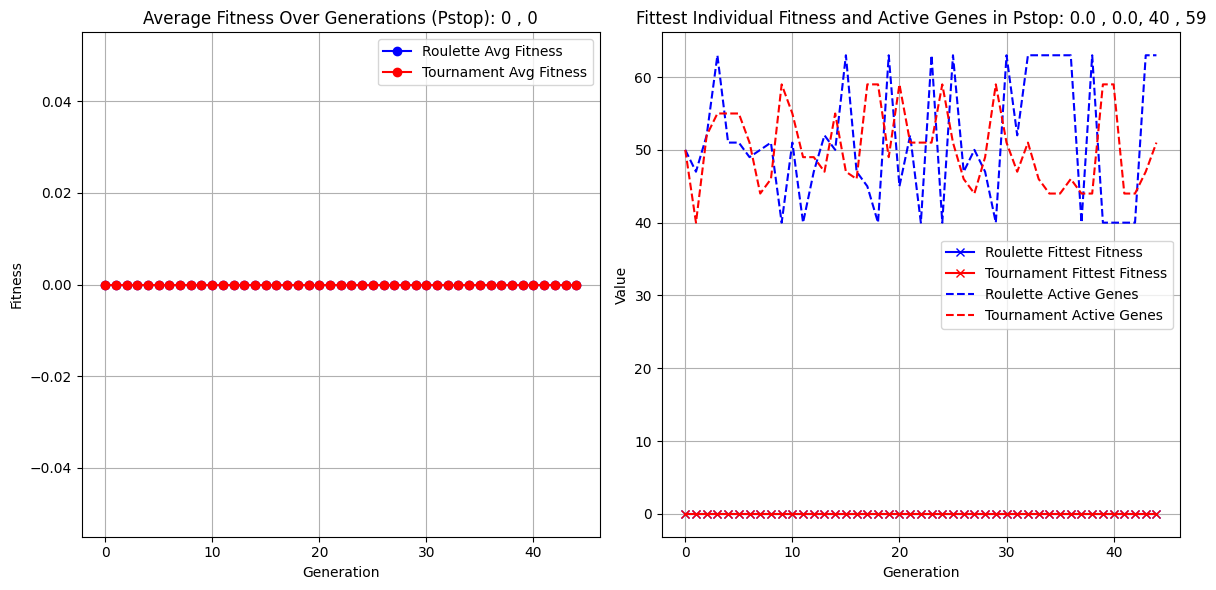

Best Overall Solution (Roulette): Fitness = 0, Generation = 0
Best Overall Solution (Tournament): Fitness = 0, Generation = 0


In [4]:
config = "config_1.txt"
compare(config)
config = "config_2.txt"
compare(config)

**Problem 1 - Q2. Extra Credit - Implementing custom fitness function with selection only**

In [5]:
import numpy as np

def initpop(config, seed = None):
    if seed is not None:
        np.random.seed(seed)
    with open(config, 'r') as f:
        lines = f.readlines()
    if '=' in lines[0]:
        for line in lines:
            line = line.strip()
            if line.startswith("popsize"):
                pop = int(line.split('=')[1].strip())
            elif line.startswith("numitems"):
                n = int(line.split('=')[1].strip())
            elif line.startswith("maxgen"):
                stop = int(line.split('=')[1].strip())
            elif line.startswith("totweight"):
                W = int(line.split('=')[1].strip())
            elif line.startswith("Svalues"):
                continue
            elif line:
                weight, val = map(int, line.split())
                S.append((weight, val))
    else:
        pop, n, stop, W = map(int, [lines[i].strip() for i in range(4)])
        S = [tuple(map(int, line.strip().split())) for line in lines[4:]]
    g = 0
    p = np.random.randint(2, size = (pop, n))
    return p, W, S, g, stop

In [6]:
def repair(individual, S, W):
    totweight = sum([S[i][0] for i in range(len(individual)) if individual[i] == 1])
    if totweight > W:
        remove = [(S[i][0] / S[i][1], i) for i in range(len(S))]
        remove.sort()
        for ratio, i in remove:
            if individual[i] == 1:
                individual[i] = 0
                totweight -= S[i][0]
                if totweight <= W:
                    break
    return individual

def nfitness(chromo, S, W):
    totweight = 0
    totval = 0
    for i, gene in enumerate(chromo):
        totweight += gene * S[i][0]
        totval += gene * S[i][1]
    if totweight > W:
        penalty = 0.5
        return totval - penalty * (totweight - W)
    return totval

def roulette(pop, fit):
    totfit = sum(fit)
    if totfit == 0:
        selected = np.random.choice(len(pop), size=2)
    else:
        prob = [f / totfit for f in fit]
        selected = np.random.choice(len(pop), size=2, p=prob)
    return pop[selected[0]], pop[selected[1]]

def tournament(pop, fit, size=3):
    selected = []
    for _ in range(2):
        parents = np.random.choice(len(pop), size, replace=False)
        best = max(parents, key=lambda i: fit[i])
        selected.append(pop[best])
    return selected[0], selected[1]

In [7]:
import matplotlib.pyplot as plt
def genalgo(config, criteria='roulette'):
    p, W, S, g, stop = initpop(config, seed=5342)
    n = len(S)
    avgfit = []
    fittest = []
    actgenes = []
    bestfit = -float('inf')
    bestsol = None
    bestgen = 0

    for gen in range(stop):
        fitval = [nfitness(i, S, W) for i in p]
        newpop = []
        for _ in range(n // 2):
            if criteria == 'roulette':
                p1, p2 = roulette(p, fitval)
            else:
                p1, p2 = tournament(p, fitval)
            p1 = repair(p1, S, W)
            p2 = repair(p2, S, W)
            newpop.append(p1)
            newpop.append(p2)
        p = np.array(newpop)
        if gen == 0:
            avgfitness = np.mean(fitval)
            avgfit.append(avgfitness)
            fitsol = p[np.argmax(fitval)]
            f = fitval[np.argmax(fitval)]
            actgen = np.sum(fitsol)
            totweight = sum([S[i][0] * gene for i, gene in enumerate(fitsol)])
            if totweight <= W:
                fittest.append(f)
                actgenes.append(actgen)
        nfitval = [nfitness(i, S, W) for i in p]
        avgfitness = np.mean(nfitval)
        avgfit.append(avgfitness)
        fitsol = p[np.argmax(nfitval)]
        f = nfitval[np.argmax(nfitval)]
        actgen = np.sum(fitsol)
        fittest.append(f)
        actgenes.append(actgen)
        if f > bestfit:
            bestfit = f
            bestsol = fitsol
            bestgen = gen
    fitPstop = [fitness(i, S, W) for i in p]
    avgfitPstop = np.mean(fitPstop)
    fitsolPstop = p[np.argmax(fitPstop)]
    fPstop = fitPstop[np.argmax(fitPstop)]
    actgenesPstop = np.sum(fitsolPstop)
    print(bestsol)
    totweight = sum([S[i][0] * gene for i, gene in enumerate(bestsol)])
    print(totweight)
    return (avgfit, fittest, actgenes, avgfitPstop, fPstop, actgenesPstop, bestsol, bestfit, bestgen)

def display(rdata, tdata):
    gen = range(0, len(rdata[0]))

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(gen, rdata[0], label="Roulette Avg Fitness", color='b', marker="o")
    plt.plot(gen, tdata[0], label="Tournament Avg Fitness", color='r', marker="o")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.title(f"Average Fitness Over Generations (Pstop): {rdata[4]} , {tdata[4]}")
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(gen, rdata[1], label="Roulette Fittest Fitness", color='b', marker="x")
    plt.plot(gen, tdata[1], label="Tournament Fittest Fitness", color='r', marker="x")
    plt.plot(gen, rdata[2], label="Roulette Active Genes", color='b', linestyle='dashed')
    plt.plot(gen, tdata[2], label="Tournament Active Genes", color='r', linestyle='dashed')
    plt.xlabel("Generation")
    plt.ylabel("Value")
    plt.title(f"Fittest Individual Fitness and Active Genes in Pstop: {rdata[7]} , {tdata[7]}, {rdata[5]} , {tdata[5]}")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

def compare(config):
    rdata = genalgo(config, criteria='roulette')
    tdata = genalgo(config, criteria='tournament')
    display(rdata, tdata)
    
    print(f"Best Overall Solution (Roulette): Fitness = {rdata[7]}, Generation = {rdata[8]}")
    print(f"Best Overall Solution (Tournament): Fitness = {tdata[7]}, Generation = {tdata[8]}")


[1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0
 0 0 1 0 1 0 1 0 0 1 0 0 0]
684
[1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0
 0 0 1 0 1 0 1 0 0 1 0 0 0]
684


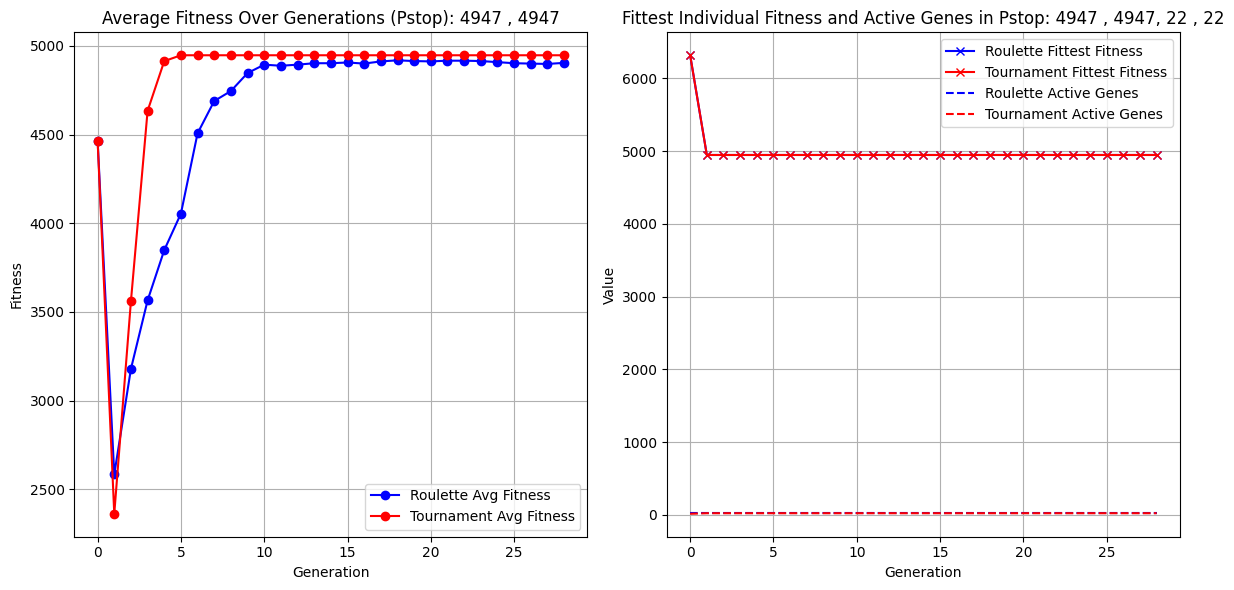

Best Overall Solution (Roulette): Fitness = 4947, Generation = 0
Best Overall Solution (Tournament): Fitness = 4947, Generation = 0
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2276
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2276


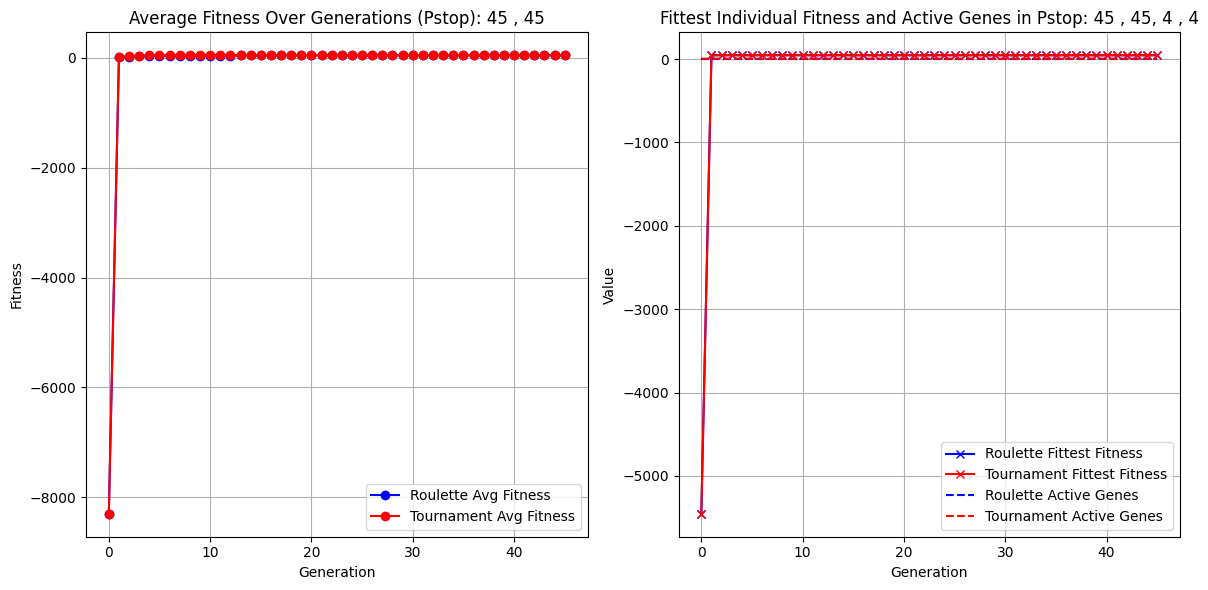

Best Overall Solution (Roulette): Fitness = 45, Generation = 0
Best Overall Solution (Tournament): Fitness = 45, Generation = 0


In [8]:
config = "config_1.txt"
compare(config)
config = "config_2.txt"
compare(config)

**Problem 1 - Q3. Implementing Genetic Algorithm with Crossover and Mutation (mrate) with given fitness function**

In [9]:
import numpy as np

def initpop(config, seed = None):
    if seed is not None:
        np.random.seed(seed)
    with open(config, 'r') as f:
        lines = f.readlines()
    if '=' in lines[0]:
        for line in lines:
            line = line.strip()
            if line.startswith("popsize"):
                pop = int(line.split('=')[1].strip())
            elif line.startswith("numitems"):
                n = int(line.split('=')[1].strip())
            elif line.startswith("maxgen"):
                stop = int(line.split('=')[1].strip())
            elif line.startswith("totweight"):
                W = int(line.split('=')[1].strip())
            elif line.startswith("Svalues"):
                continue
            elif line:
                weight, val = map(int, line.split())
                S.append((weight, val))
    else:
        pop, n, stop, W = map(int, [lines[i].strip() for i in range(4)])
        S = [tuple(map(int, line.strip().split())) for line in lines[4:]]
    g = 0
    p = np.random.randint(2, size = (pop, n))
    return p, W, S, g, stop

In [10]:
def fitness(chromo, S, W):
    totweight = 0
    totval = 0
    for i, gene in enumerate(chromo):
        totweight += gene * S[i][0]
        totval += gene * S[i][1]
    if totweight > W:
        return 0
    return totval

def roulette(pop, fit):
    totfit = sum(fit)
    if totfit == 0:
        selected = np.random.choice(len(pop), size=2)
    else:
        prob = [f / totfit for f in fit]
        selected = np.random.choice(len(pop), size=2, p=prob)
    return pop[selected[0]], pop[selected[1]]

def tournament(pop, fit, size=3):
    selected = []
    psize = len(pop)
    if size > psize:
        size = psize
    for _ in range(2):
        participants = np.random.choice(psize, size, replace=False)
        best = max(participants, key=lambda i: fit[i])
        selected.append(pop[best])
    return selected[0], selected[1]


In [11]:
def crossover(p1, p2, crate=0.1):
    if np.random.rand() > crate:
        point = np.random.randint(1, len(p1) - 1)
        o1 = np.concatenate([p1[:point], p2[point:]])
        o2 = np.concatenate([p2[:point], p1[point:]])
    else:
        o1, o2 = np.copy(p1), np.copy(p2)
    return o1, o2

def mutation(chromo, mrate):
    for i in range(len(chromo)):
        if np.random.rand() < mrate:
            chromo[i] = 1 - chromo[i]
    return chromo

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def genalgo(config, criteria='roulette', mrate=0.1):
    p, W, S, g, stop = initpop(config, seed=5342)
    n = len(S)
    avgfit = []
    fittest = []
    actgenes = []
    bestfit = -float('inf')
    bestsol = None
    bestgen = 0

    for gen in range(stop):
        fitval = [fitness(i, S, W) for i in p]
        avgfitness = np.mean(fitval)
        avgfit.append(avgfitness)
        fitID = np.argmax(fitval)
        fitsol = p[fitID]
        f = fitval[fitID]
        actgen = np.sum(fitsol)
        fittest.append(f)
        actgenes.append(actgen)
        newpop = []
        for _ in range(n // 2):
            if criteria == 'roulette':
                p1, p2 = roulette(p, fitval)
            else:
                p1, p2 = tournament(p, fitval)
            o1, o2 = crossover(p1, p2)
            o1 = mutation(o1, mrate)
            o2 = mutation(o2, mrate)
            newpop.append(o1)
            newpop.append(o2)
        p = np.array(newpop)
        if f > bestfit:
            bestfit = f
            bestsol = fitsol
            bestgen = gen
    fitPstop = [fitness(i, S, W) for i in p]
    avgfitPstop = np.mean(fitPstop)
    fitIDPstop = np.argmax(fitPstop)
    fitsolPstop = p[fitIDPstop]
    fPstop = fitPstop[fitIDPstop]
    actgenesPstop = np.sum(fitsolPstop)
    print(bestsol)
    totweight = sum([S[i][0] * gene for i, gene in enumerate(bestsol)])
    print(totweight)
    return (avgfit, fittest, actgenes, avgfitPstop, fPstop, actgenesPstop, bestsol, bestfit, bestgen)

def display(rdata, tdata, mrate):
    gen = range(0, len(rdata[0]))
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(gen, rdata[0], label=f"Roulette Avg Fitness (mrate={mrate})", color='b', marker="o")
    plt.plot(gen, tdata[0], label=f"Tournament Avg Fitness (mrate={mrate})", color='r', marker="o")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.title(f"Average Fitness Over Generations (Pstop): {rdata[4]} , {tdata[4]}")
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(gen, rdata[1], label=f"Roulette Fittest Fitness (mrate={mrate})", color='b', marker="x")
    plt.plot(gen, tdata[1], label=f"Tournament Fittest Fitness (mrate={mrate})", color='r', marker="x")
    plt.plot(gen, rdata[2], label=f"Roulette Active Genes (mrate={mrate})", color='b', linestyle='dashed')
    plt.plot(gen, tdata[2], label=f"Tournament Active Genes (mrate={mrate})", color='r', linestyle='dashed')
    plt.xlabel("Generation")
    plt.ylabel("Value")
    plt.title(f"Fittest Individual Fitness and Active Genes in Pstop: {rdata[7]} , {tdata[7]}, {rdata[5]} , {tdata[5]}")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

def compare(config):
    results = []
    for mrate in np.arange(0, 0.25, 0.05):
        print(f"\n--- Mutation Rate: {mrate} ---")
        rdata = genalgo(config, criteria='roulette', mrate=mrate)
        tdata = genalgo(config, criteria='tournament', mrate=mrate)
        display(rdata, tdata, mrate)

        results.append({
            'MRate': mrate,
            'Roulette Best Fit': rdata[7],
            'Roulette Gen': rdata[8],
            'Tournament Best Fit': tdata[7],
            'Tournament Gen': tdata[8]
        })
        
        print(f"Best Overall Solution (Roulette): Fitness = {rdata[7]}, Generation = {rdata[8]}")
        print(f"Best Overall Solution (Tournament): Fitness = {tdata[7]}, Generation = {tdata[8]}")
    
    results_df = pd.DataFrame(results)
    print("\n--- Best Solutions Summary ---")
    print(results_df)



--- Mutation Rate: 0.0 ---
[1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0
 0 0 1 0 1 1 1 1 1 0 0 1 0]
838
[1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 1 1 0
 0 1 1 0 1 1 1 1 0 0 1 0 1]
797


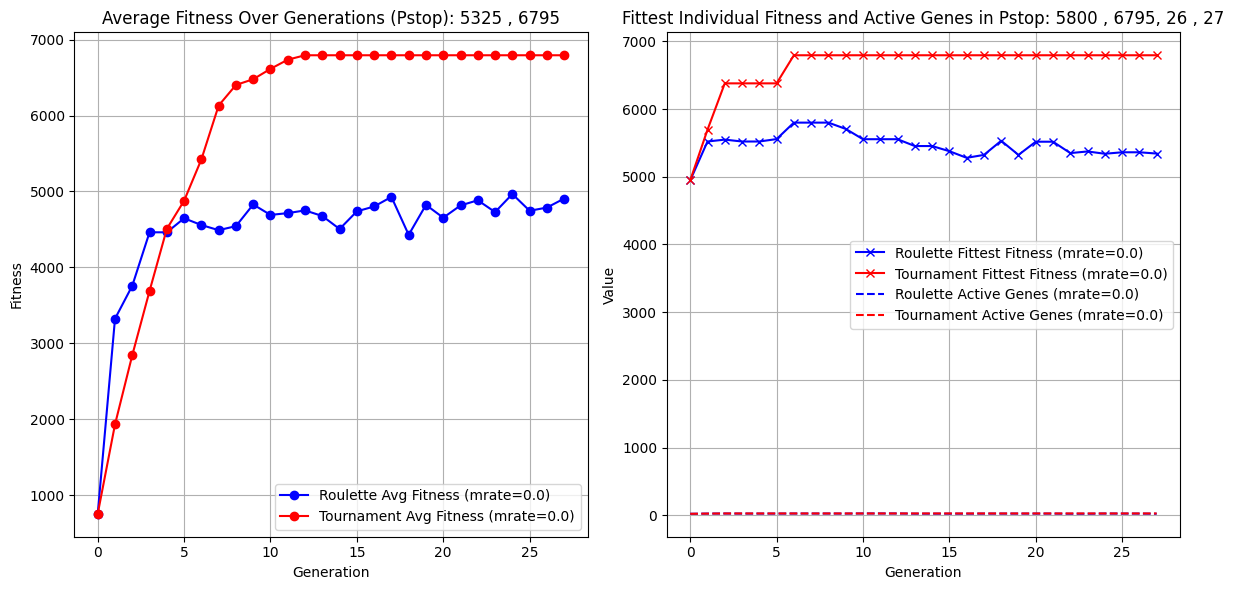

Best Overall Solution (Roulette): Fitness = 5800, Generation = 6
Best Overall Solution (Tournament): Fitness = 6795, Generation = 6

--- Mutation Rate: 0.05 ---
[1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1 1 0 0
 0 0 1 0 1 1 1 1 0 0 1 0 1]
805
[1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 0
 0 1 1 0 0 1 0 1 0 1 0 1 1]
850


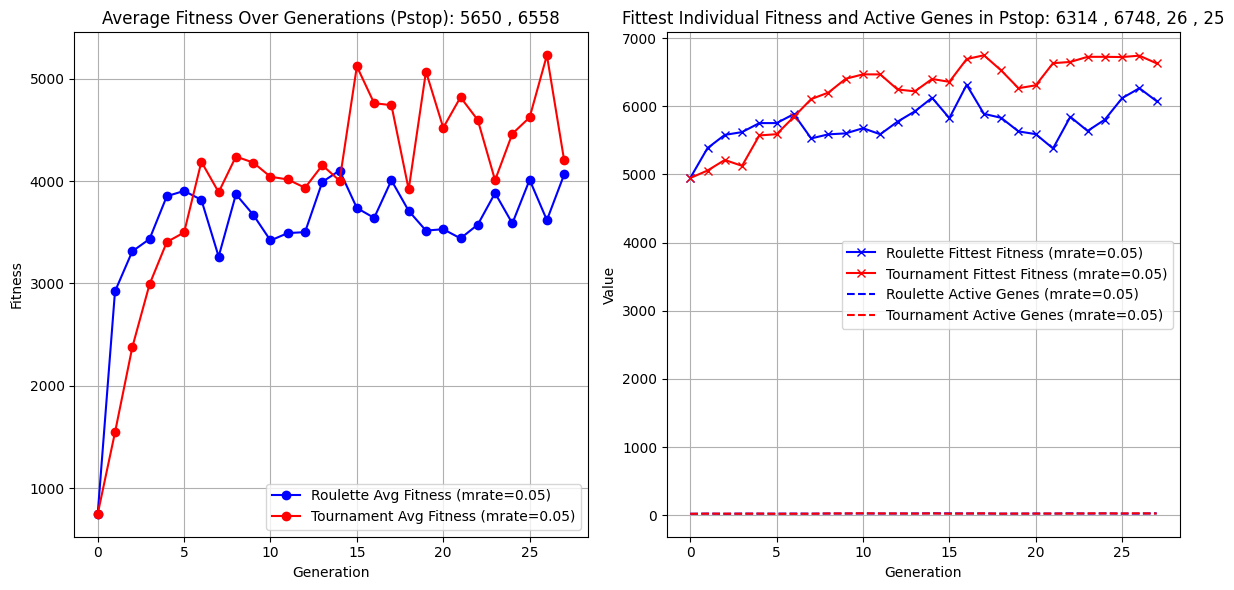

Best Overall Solution (Roulette): Fitness = 6314, Generation = 16
Best Overall Solution (Tournament): Fitness = 6748, Generation = 17

--- Mutation Rate: 0.1 ---
[1 1 0 0 0 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0
 1 0 1 0 1 1 1 0 0 0 1 1 0]
754
[1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 1 1 1 1]
771


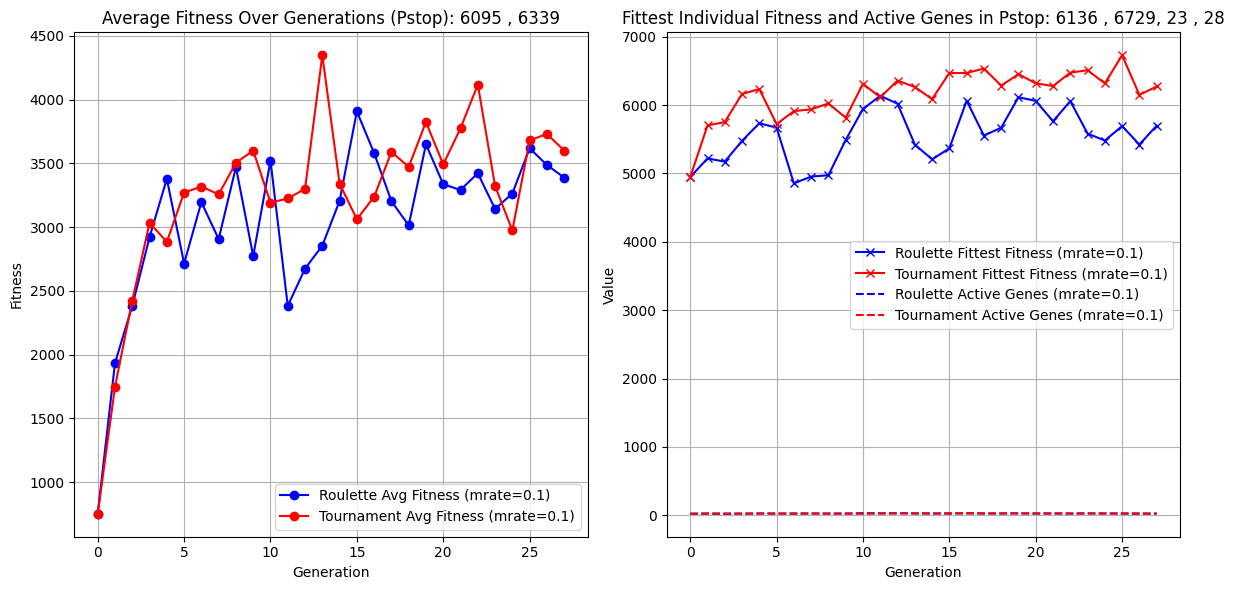

Best Overall Solution (Roulette): Fitness = 6136, Generation = 11
Best Overall Solution (Tournament): Fitness = 6729, Generation = 25

--- Mutation Rate: 0.15000000000000002 ---
[1 0 0 0 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 1]
741
[1 0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 0 0 1 1 0
 0 0 1 1 0 0 0 1 0 1 1 1 1]
727


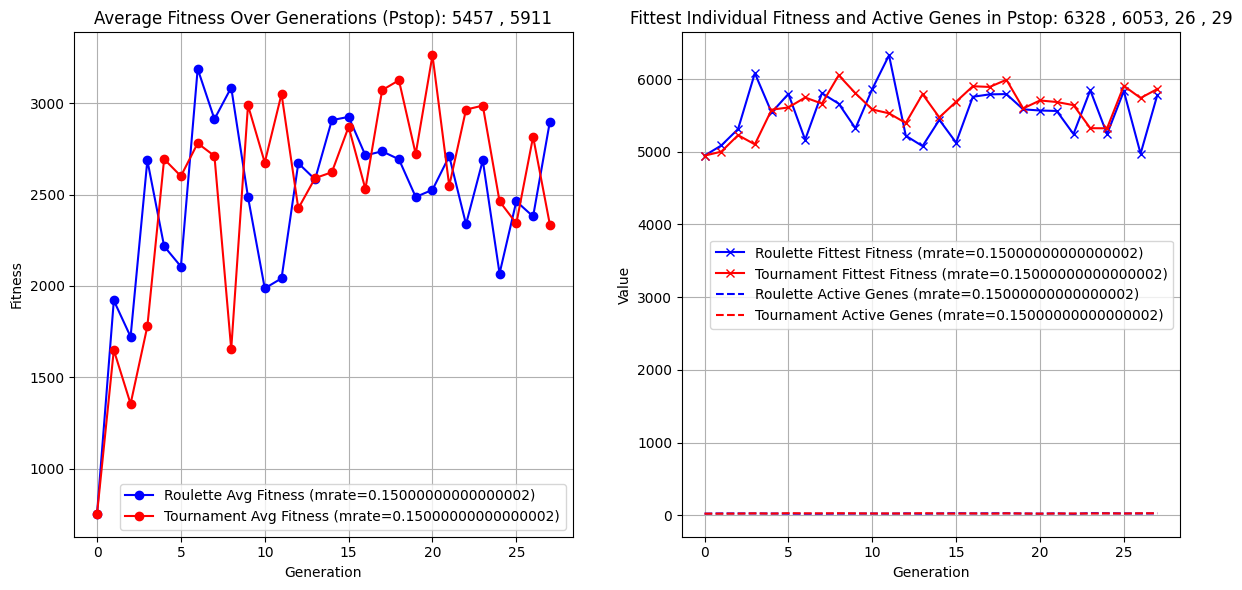

Best Overall Solution (Roulette): Fitness = 6328, Generation = 11
Best Overall Solution (Tournament): Fitness = 6053, Generation = 8

--- Mutation Rate: 0.2 ---
[1 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 0 1 1 0 0
 0 0 1 0 1 1 1 0 0 0 0 1 1]
784
[1 0 0 0 0 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 0
 1 0 1 0 1 0 0 1 0 0 1 1 1]
830


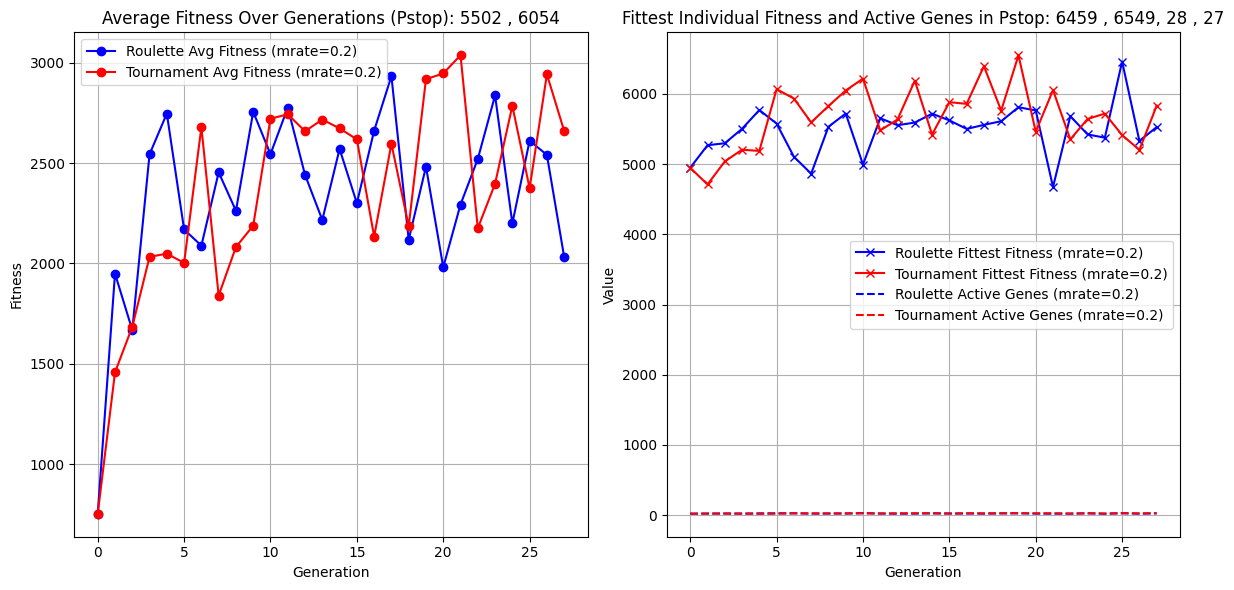

Best Overall Solution (Roulette): Fitness = 6459, Generation = 25
Best Overall Solution (Tournament): Fitness = 6549, Generation = 19

--- Best Solutions Summary ---
   MRate  Roulette Best Fit  Roulette Gen  Tournament Best Fit  Tournament Gen
0   0.00               5800             6                 6795               6
1   0.05               6314            16                 6748              17
2   0.10               6136            11                 6729              25
3   0.15               6328            11                 6053               8
4   0.20               6459            25                 6549              19

--- Mutation Rate: 0.0 ---
[1 0 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 0
 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0
 1 1 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0]
22728
[1 0 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 0
 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 

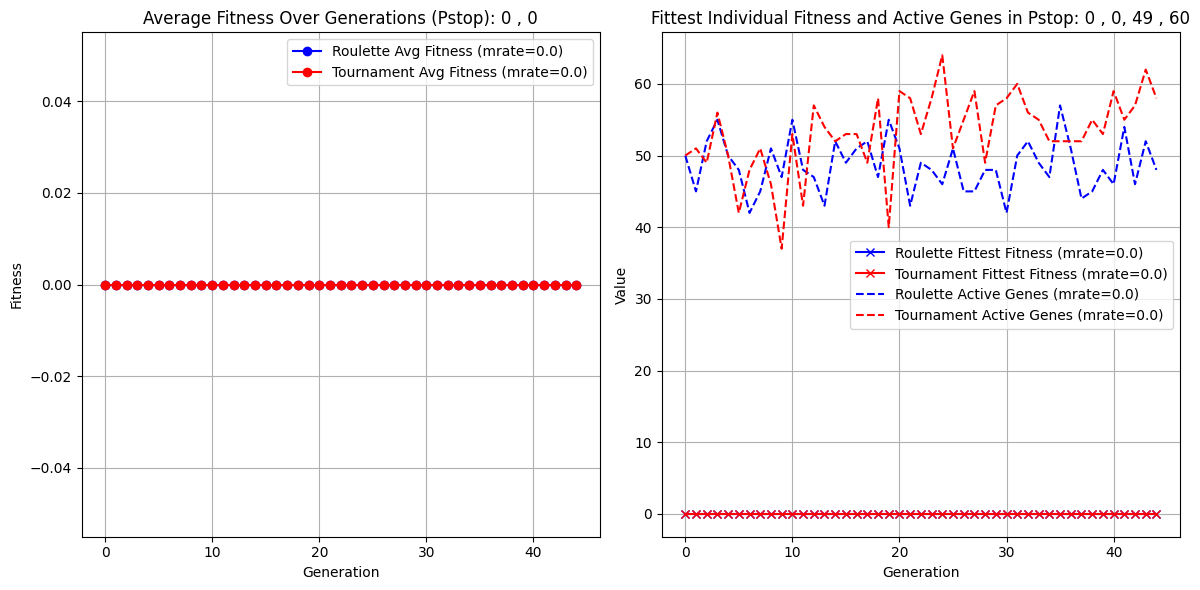

Best Overall Solution (Roulette): Fitness = 0, Generation = 0
Best Overall Solution (Tournament): Fitness = 0, Generation = 0

--- Mutation Rate: 0.05 ---
[1 0 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 0
 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0
 1 1 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0]
22728
[1 0 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 0
 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0
 1 1 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0]
22728


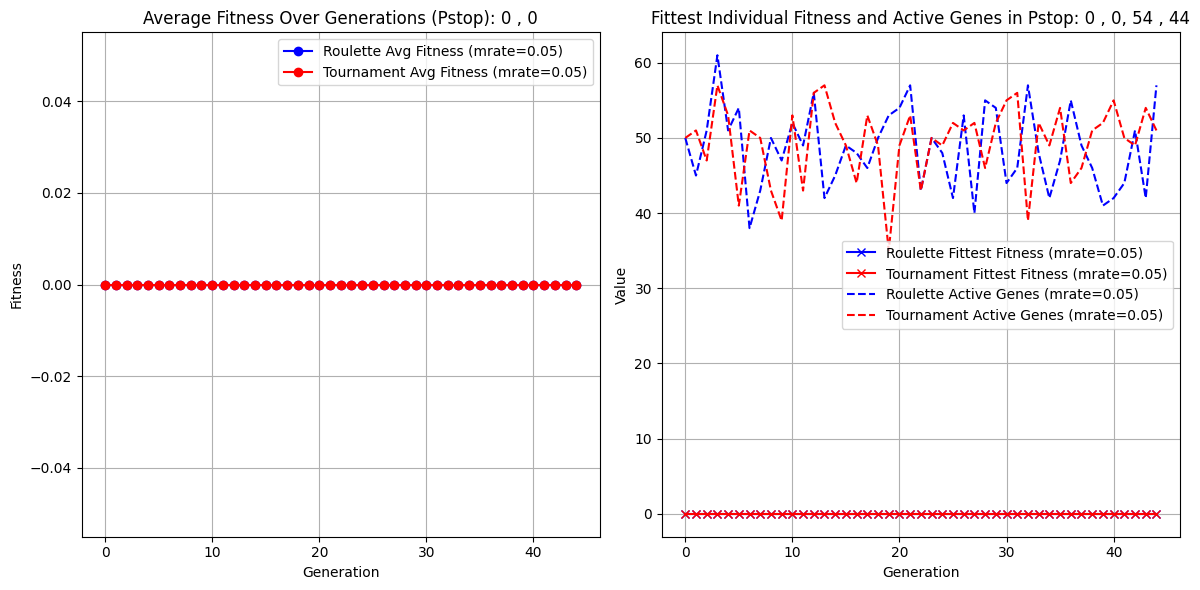

Best Overall Solution (Roulette): Fitness = 0, Generation = 0
Best Overall Solution (Tournament): Fitness = 0, Generation = 0

--- Mutation Rate: 0.1 ---
[1 0 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 0
 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0
 1 1 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0]
22728
[1 0 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 0
 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0
 1 1 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0]
22728


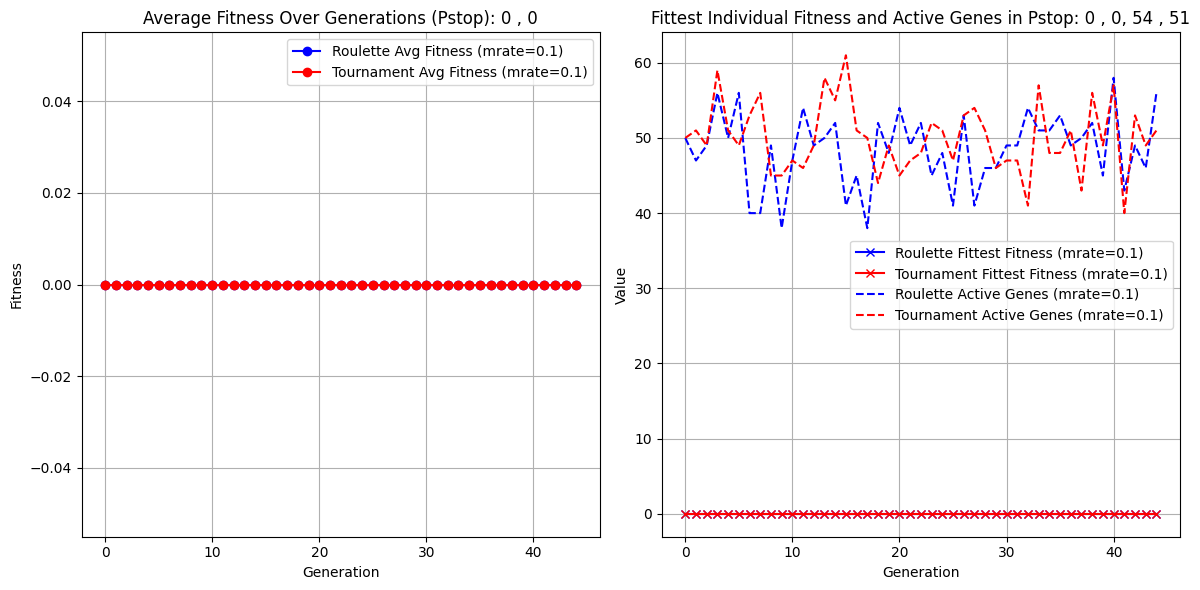

Best Overall Solution (Roulette): Fitness = 0, Generation = 0
Best Overall Solution (Tournament): Fitness = 0, Generation = 0

--- Mutation Rate: 0.15000000000000002 ---
[1 0 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 0
 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0
 1 1 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0]
22728
[1 0 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 0
 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0
 1 1 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0]
22728


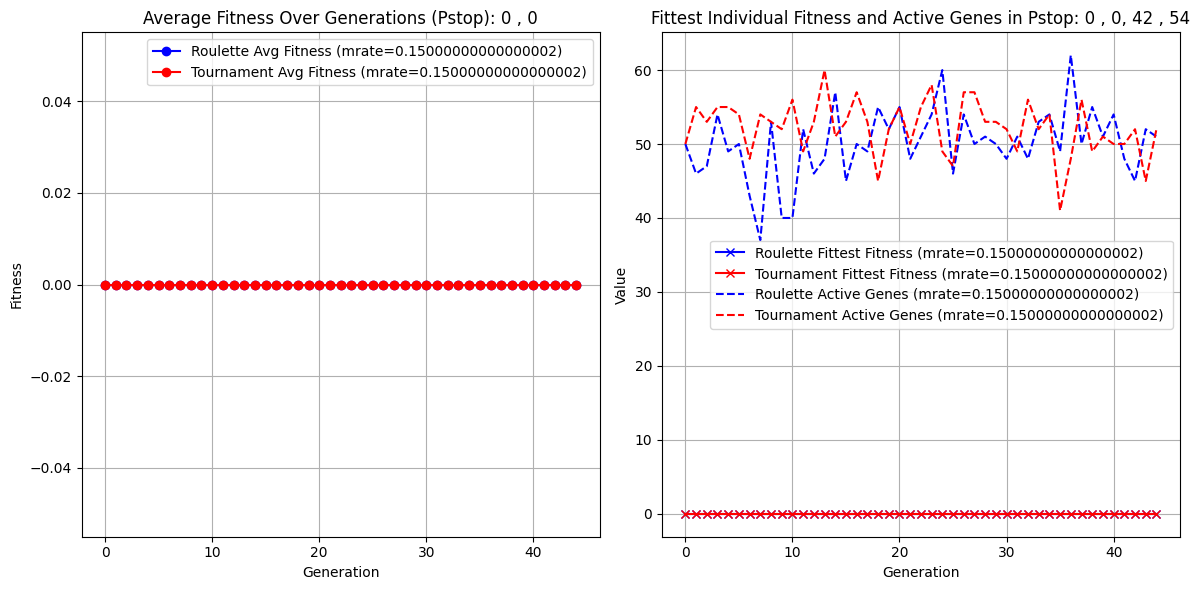

Best Overall Solution (Roulette): Fitness = 0, Generation = 0
Best Overall Solution (Tournament): Fitness = 0, Generation = 0

--- Mutation Rate: 0.2 ---
[1 0 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 0
 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0
 1 1 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0]
22728
[1 0 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 0
 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0
 1 1 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0]
22728


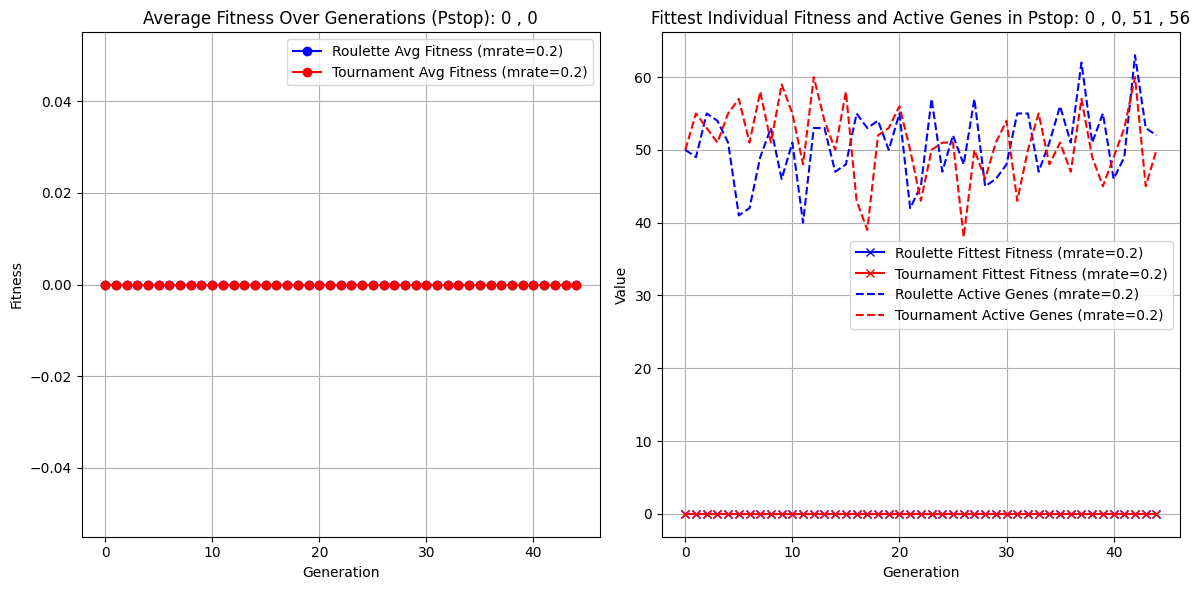

Best Overall Solution (Roulette): Fitness = 0, Generation = 0
Best Overall Solution (Tournament): Fitness = 0, Generation = 0

--- Best Solutions Summary ---
   MRate  Roulette Best Fit  Roulette Gen  Tournament Best Fit  Tournament Gen
0   0.00                  0             0                    0               0
1   0.05                  0             0                    0               0
2   0.10                  0             0                    0               0
3   0.15                  0             0                    0               0
4   0.20                  0             0                    0               0


In [13]:
config = "config_1.txt"
compare(config)
config = "config_2.txt"
compare(config)

**Problem 1 - Q3. Implementing Crossover and Mutation with Custom Fitness Function**

In [14]:
import numpy as np

def initpop(config, seed = None):
    if seed is not None:
        np.random.seed(seed)
    with open(config, 'r') as f:
        lines = f.readlines()
    if '=' in lines[0]:
        for line in lines:
            line = line.strip()
            if line.startswith("popsize"):
                pop = int(line.split('=')[1].strip())
            elif line.startswith("numitems"):
                n = int(line.split('=')[1].strip())
            elif line.startswith("maxgen"):
                stop = int(line.split('=')[1].strip())
            elif line.startswith("totweight"):
                W = int(line.split('=')[1].strip())
            elif line.startswith("Svalues"):
                continue
            elif line:
                weight, val = map(int, line.split())
                S.append((weight, val))
    else:
        pop, n, stop, W = map(int, [lines[i].strip() for i in range(4)])
        S = [tuple(map(int, line.strip().split())) for line in lines[4:]]
    g = 0
    p = np.random.randint(2, size = (pop, n))
    return p, W, S, g, stop

In [15]:
def repair(individual, S, W):
    totweight = sum([S[i][0] for i in range(len(individual)) if individual[i] == 1])
    if totweight > W:
        remove = [(S[i][0] / S[i][1], i) for i in range(len(S))]
        remove.sort()
        for ratio, i in remove:
            if individual[i] == 1:
                individual[i] = 0
                totweight -= S[i][0]
                if totweight <= W:
                    break
    return individual

def fitness(chromo, S, W):
    totweight = 0
    totval = 0
    for i, gene in enumerate(chromo):
        totweight += gene * S[i][0]
        totval += gene * S[i][1]
    if totweight > W:
        penalty = 0.5
        return totval - penalty * (totweight - W)
    return totval

def roulette(pop, fit):
    totfit = sum(fit)
    if totfit == 0:
        selected = np.random.choice(len(pop), size=2)
    else:
        prob = [f / totfit for f in fit]
        selected = np.random.choice(len(pop), size=2, p=prob)
    return pop[selected[0]], pop[selected[1]]

def tournament(pop, fit, size=3):
    selected = []
    psize = len(pop)
    if size > psize:
        size = psize
    for _ in range(2):
        participants = np.random.choice(psize, size, replace=False)
        best = max(participants, key=lambda i: fit[i])
        selected.append(pop[best])
    return selected[0], selected[1]


In [16]:
def crossover(p1, p2, crate=0.1):
    if np.random.rand() > crate:
        point = np.random.randint(1, len(p1) - 1)
        o1 = np.concatenate([p1[:point], p2[point:]])
        o2 = np.concatenate([p2[:point], p1[point:]])
    else:
        o1, o2 = np.copy(p1), np.copy(p2)
    return o1, o2

def mutation(chromo, mrate):
    for i in range(len(chromo)):
        if np.random.rand() < mrate:
            chromo[i] = 1 - chromo[i]
    return chromo

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

def genalgo(config, criteria='roulette', mrate=0.1):
    p, W, S, g, stop = initpop(config, seed=5342)
    n = len(S)
    avgfit = []
    fittest = []
    actgenes = []
    bestfit = -float('inf')
    bestsol = None
    bestgen = 0

    for gen in range(0, stop):
        fitval = [fitness(i, S, W) for i in p]
        avgfitness = np.mean(fitval)
        avgfit.append(avgfitness)
        fitsol = p[np.argmax(fitval)]
        f = fitval[np.argmax(fitval)]
        actgen = np.sum(fitsol)
        if gen == 0:
            totweight = sum([S[i][0] * gene for i, gene in enumerate(fitsol)])
            if totweight <= W:
                fittest.append(f)
            else:
                f = 0
                fittest.append(f)
        else:
            fittest.append(f)
        actgenes.append(actgen)
        newpop = []
        if f > bestfit:
            bestfit = f
            bestsol = fitsol
            bestgen = gen
        for _ in range(n // 2):
            if criteria == 'roulette':
                p1, p2 = roulette(p, fitval)
            else:
                p1, p2 = tournament(p, fitval)
            o1, o2 = crossover(p1, p2)
            o1 = mutation(o1, mrate)
            o2 = mutation(o2, mrate)
            o1 = repair(o1, S, W)
            o2 = repair(o2, S, W)
            newpop.append(o1)
            newpop.append(o2)
        p = np.array(newpop)
    fitPstop = [fitness(i, S, W) for i in p]
    avgfitPstop = np.mean(fitPstop)
    fitIDPstop = np.argmax(fitPstop)
    fitsolPstop = p[fitIDPstop]
    fPstop = fitPstop[fitIDPstop]
    actgenesPstop = np.sum(fitsolPstop)
    print(bestsol)
    totweight = sum([S[i][0] * gene for i, gene in enumerate(bestsol)])
    print(totweight)
    return (avgfit, fittest, actgenes, avgfitPstop, fPstop, actgenesPstop, bestsol, bestfit, bestgen)

def display(rdata, tdata, mrate):
    gen = range(0, len(rdata[0]))
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(gen, rdata[0], label=f"Roulette Avg Fitness (mrate={mrate})", color='b', marker="o")
    plt.plot(gen, tdata[0], label=f"Tournament Avg Fitness (mrate={mrate})", color='r', marker="o")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.title(f"Average Fitness Over Generations (Pstop): {rdata[4]} , {tdata[4]}")
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(gen, rdata[1], label=f"Roulette Fittest Fitness (mrate={mrate})", color='b', marker="x")
    plt.plot(gen, tdata[1], label=f"Tournament Fittest Fitness (mrate={mrate})", color='r', marker="x")
    plt.plot(gen, rdata[2], label=f"Roulette Active Genes (mrate={mrate})", color='b', linestyle='dashed')
    plt.plot(gen, tdata[2], label=f"Tournament Active Genes (mrate={mrate})", color='r', linestyle='dashed')
    plt.xlabel("Generation")
    plt.ylabel("Value")
    plt.title(f"Fittest Individual Fitness and Active Genes in Pstop: {rdata[7]} , {tdata[7]}, {rdata[5]} , {tdata[5]}")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

def compare(config):
    results = []
    for mrate in np.arange(0, 0.25, 0.05):
        print(f"\n--- Mutation Rate: {mrate} ---")
        rdata = genalgo(config, criteria='roulette', mrate=mrate)
        tdata = genalgo(config, criteria='tournament', mrate=mrate)
        display(rdata, tdata, mrate)

        results.append({
            'MRate': mrate,
            'Roulette Best Fit': rdata[7],
            'Roulette Gen': rdata[8],
            'Tournament Best Fit': tdata[7],
            'Tournament Gen': tdata[8]
        })
        
        print(f"Best Overall Solution (Roulette): Fitness = {rdata[7]}, Generation = {rdata[8]}")
        print(f"Best Overall Solution (Tournament): Fitness = {tdata[7]}, Generation = {tdata[8]}")
    
    results_df = pd.DataFrame(results)
    print("\n--- Best Solutions Summary ---")
    print(results_df)





--- Mutation Rate: 0.0 ---
[1 0 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 0 1 0 0 0 0 1 0]
815
[1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 1 1 0
 0 1 1 0 1 1 1 1 1 0 0 0 1]
803


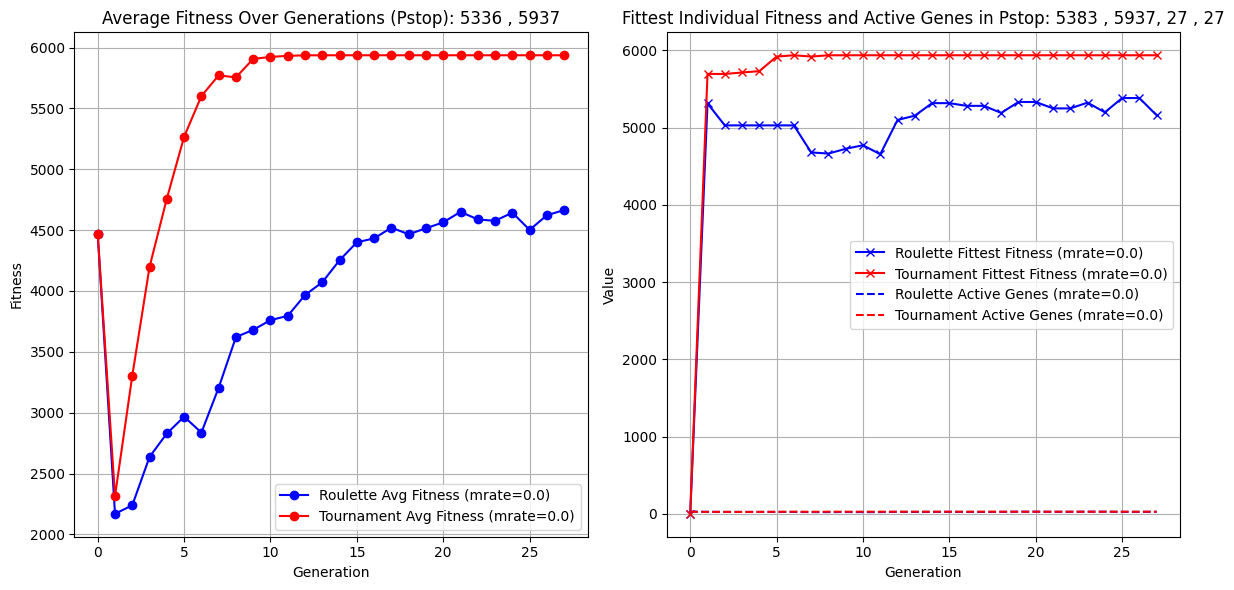

Best Overall Solution (Roulette): Fitness = 5383, Generation = 25
Best Overall Solution (Tournament): Fitness = 5937, Generation = 6

--- Mutation Rate: 0.05 ---
[1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 1]
799
[1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0
 0 0 1 0 0 1 0 1 0 1 1 1 1]
831


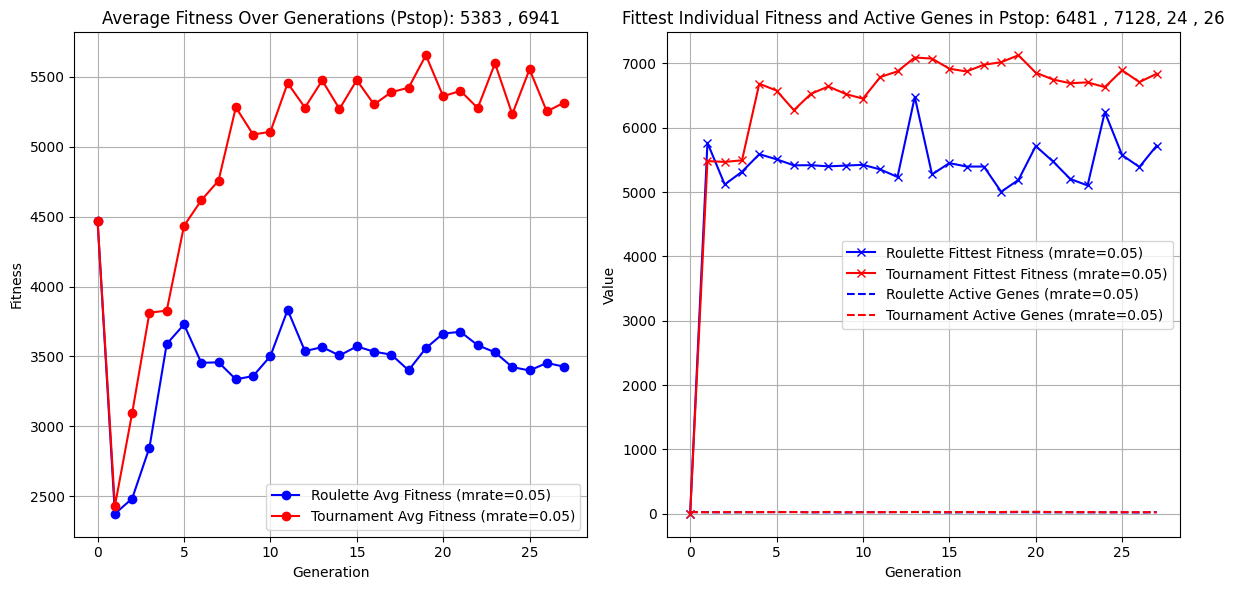

Best Overall Solution (Roulette): Fitness = 6481, Generation = 13
Best Overall Solution (Tournament): Fitness = 7128, Generation = 19

--- Mutation Rate: 0.1 ---
[1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 1 1 1
 0 0 1 0 0 1 0 1 0 0 1 0 1]
724
[1 1 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0
 1 1 0 0 1 0 0 0 0 1 1 0 1]
804


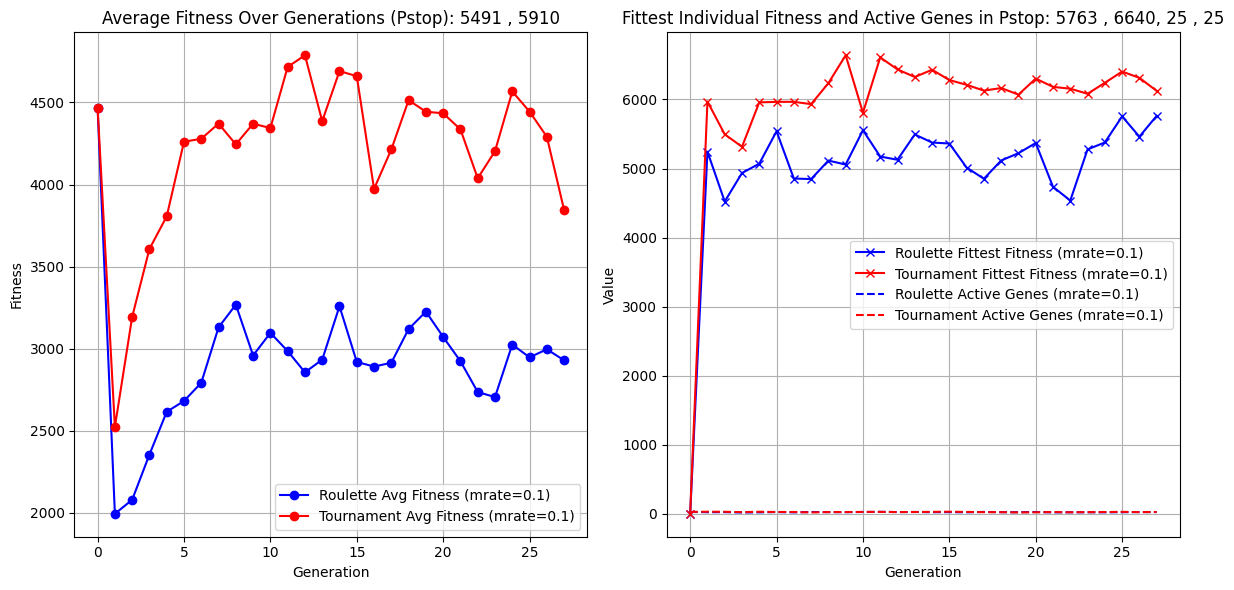

Best Overall Solution (Roulette): Fitness = 5763, Generation = 27
Best Overall Solution (Tournament): Fitness = 6640, Generation = 9

--- Mutation Rate: 0.15000000000000002 ---
[1 1 1 1 1 0 0 0 0 0 1 1 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1
 0 0 1 0 1 1 0 0 1 0 1 0 0]
802
[0 0 1 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1 0 1 1 0 0 0
 1 0 1 0 1 1 0 1 0 1 1 0 1]
846


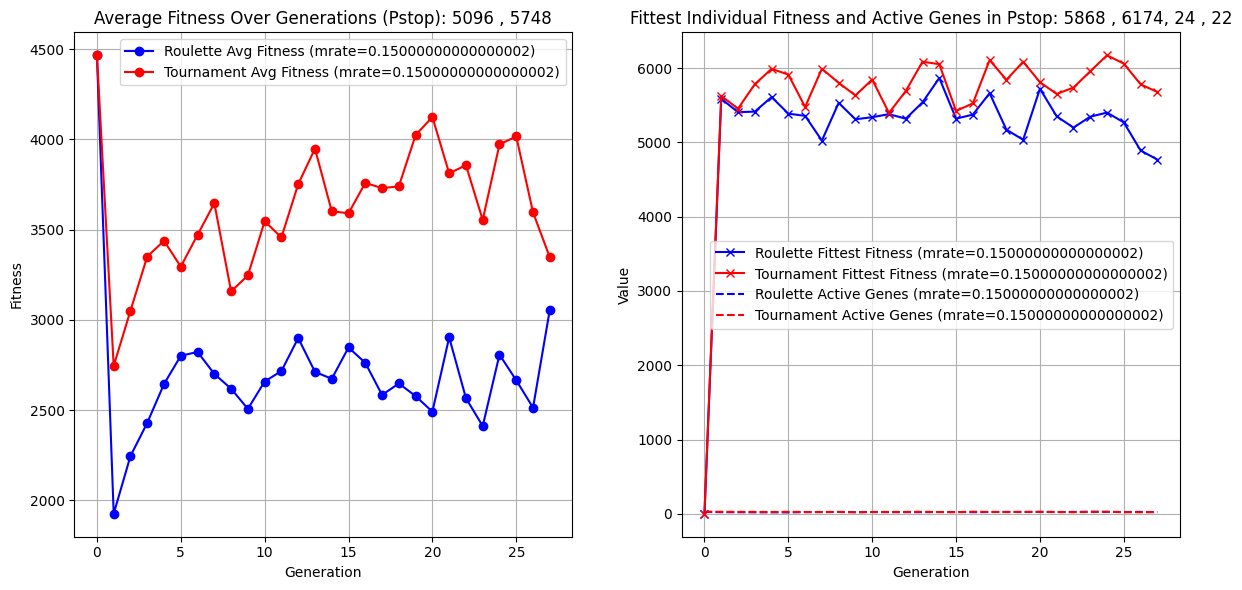

Best Overall Solution (Roulette): Fitness = 5868, Generation = 14
Best Overall Solution (Tournament): Fitness = 6174, Generation = 24

--- Mutation Rate: 0.2 ---
[1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 0 1 0 1 1]
807
[1 1 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0
 0 1 0 1 0 1 0 0 0 0 1 1 1]
809


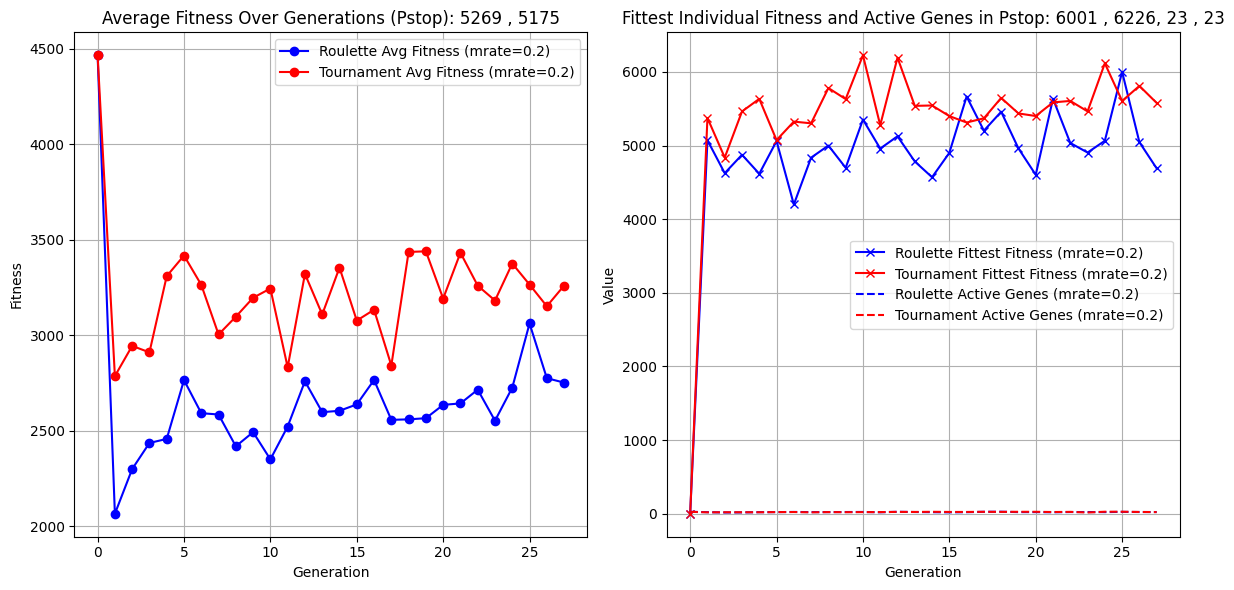

Best Overall Solution (Roulette): Fitness = 6001, Generation = 25
Best Overall Solution (Tournament): Fitness = 6226, Generation = 10

--- Best Solutions Summary ---
   MRate  Roulette Best Fit  Roulette Gen  Tournament Best Fit  Tournament Gen
0   0.00               5383            25                 5937               6
1   0.05               6481            13                 7128              19
2   0.10               5763            27                 6640               9
3   0.15               5868            14                 6174              24
4   0.20               6001            25                 6226              10

--- Mutation Rate: 0.0 ---
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
2302
[0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0

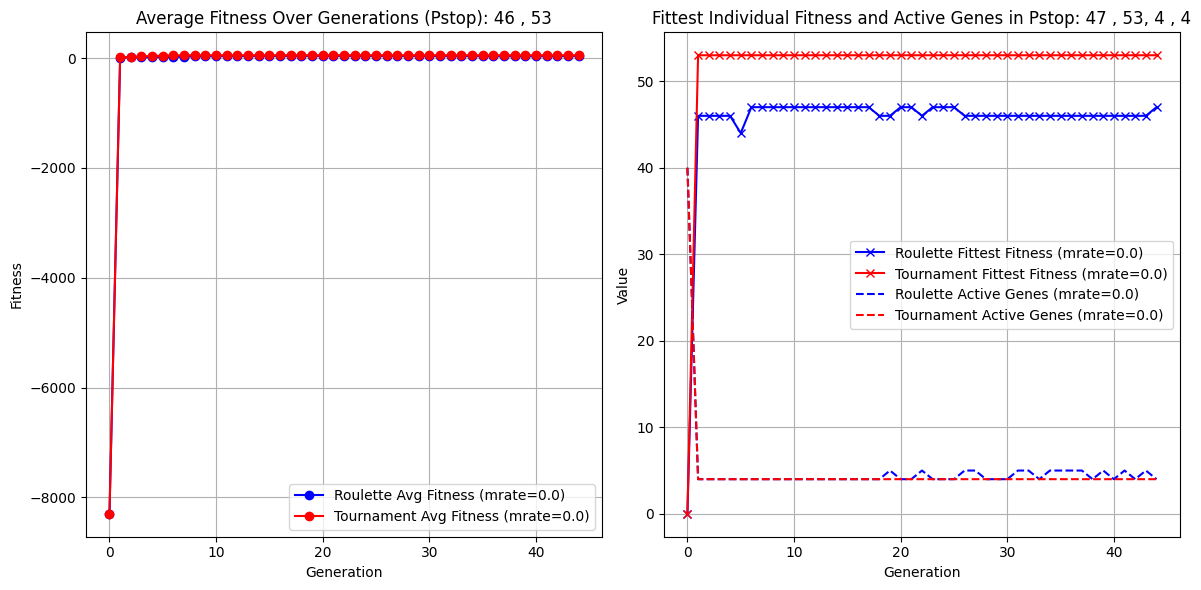

Best Overall Solution (Roulette): Fitness = 47, Generation = 6
Best Overall Solution (Tournament): Fitness = 53, Generation = 1

--- Mutation Rate: 0.05 ---
[0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0]
2055
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0]
1876


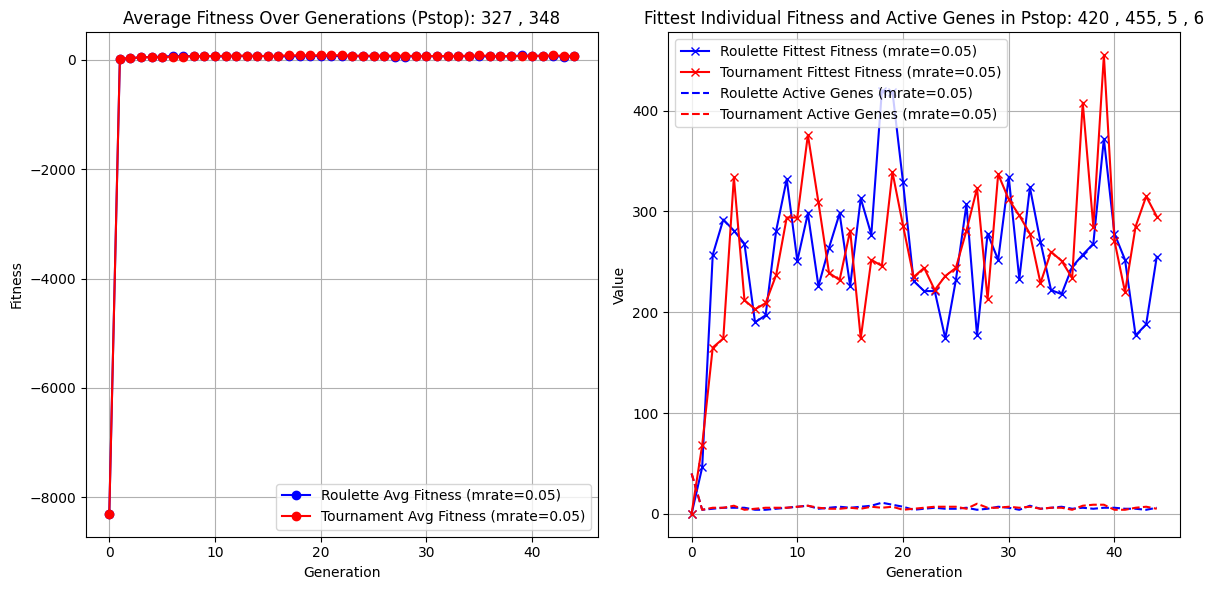

Best Overall Solution (Roulette): Fitness = 420, Generation = 18
Best Overall Solution (Tournament): Fitness = 455, Generation = 39

--- Mutation Rate: 0.1 ---
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
1717
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
2131


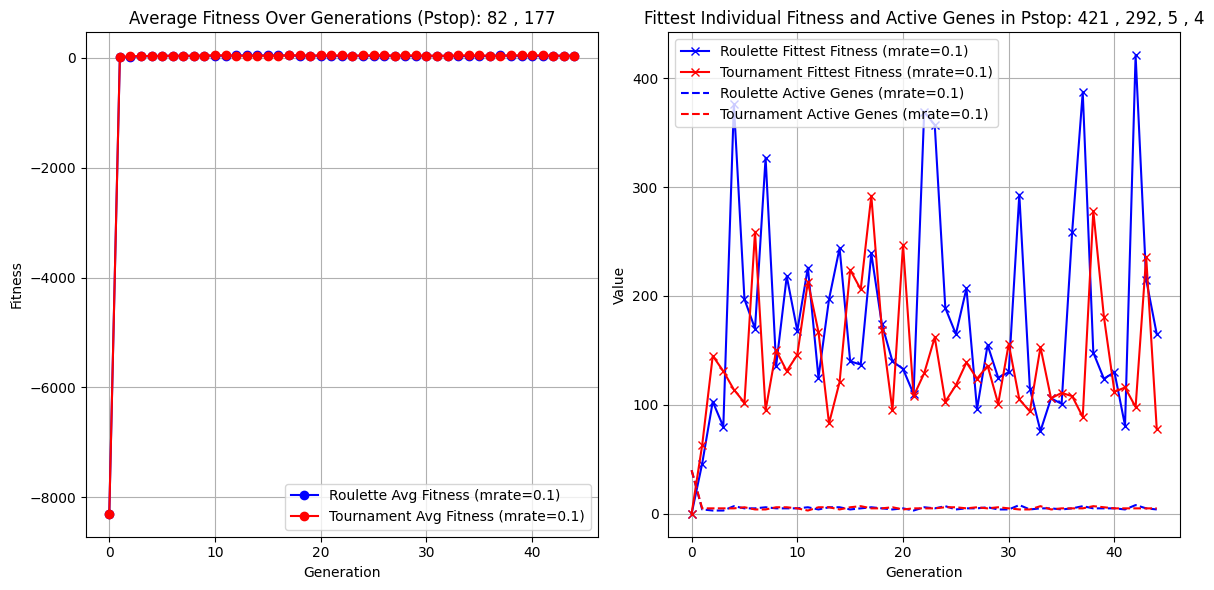

Best Overall Solution (Roulette): Fitness = 421, Generation = 42
Best Overall Solution (Tournament): Fitness = 292, Generation = 17

--- Mutation Rate: 0.15000000000000002 ---
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
2280
[1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2339


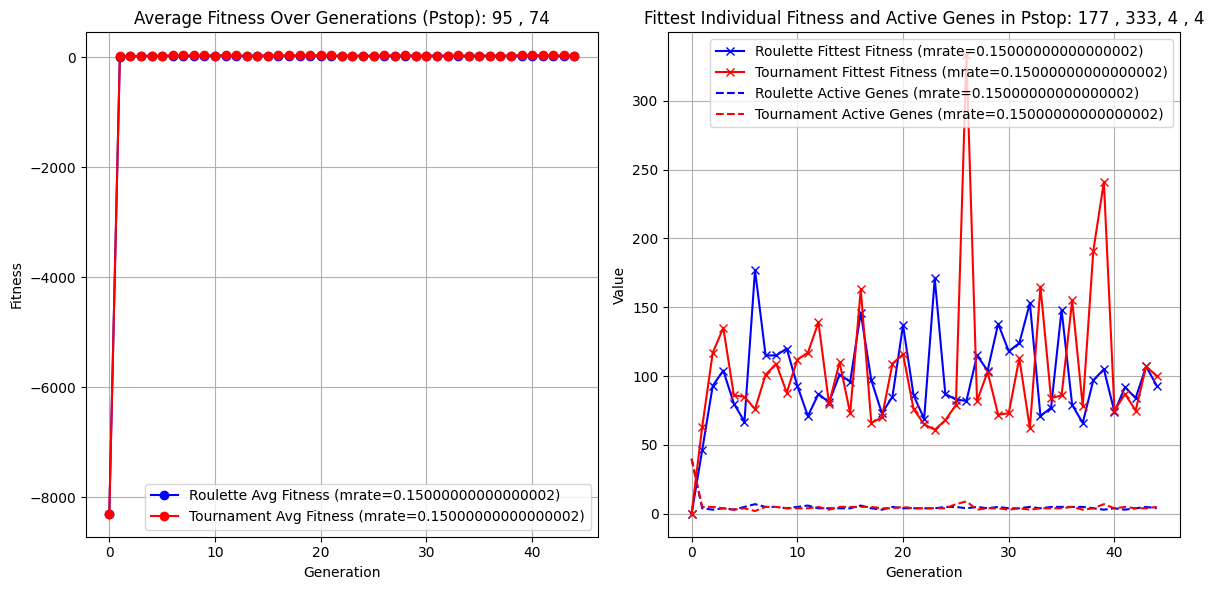

Best Overall Solution (Roulette): Fitness = 177, Generation = 6
Best Overall Solution (Tournament): Fitness = 333, Generation = 26

--- Mutation Rate: 0.2 ---
[0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
2331
[1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
2240


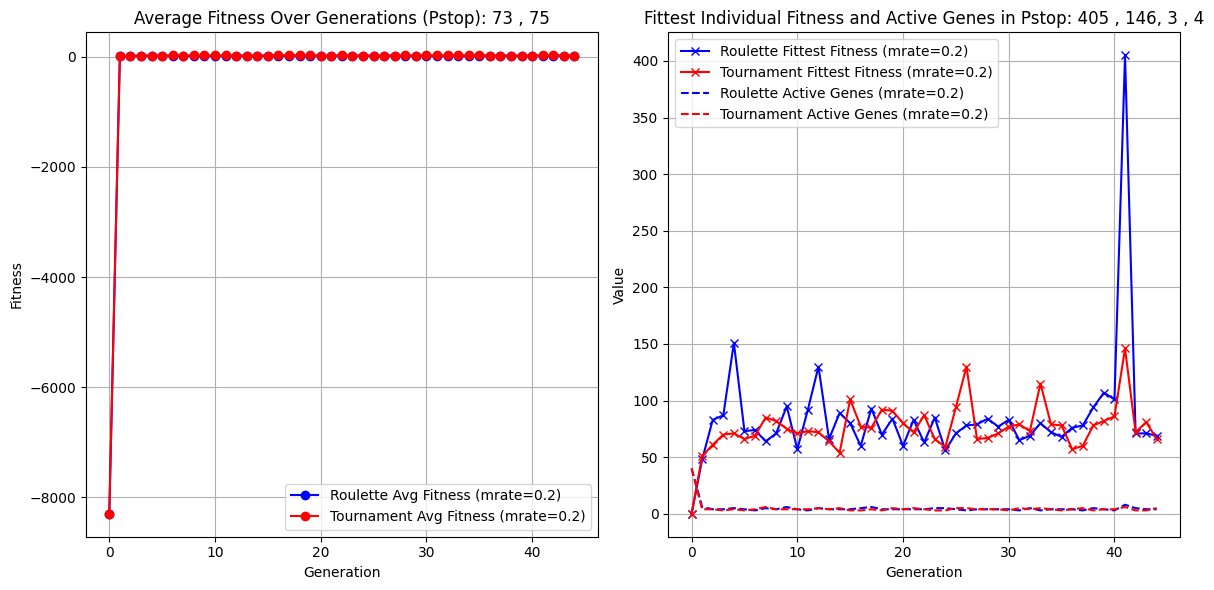

Best Overall Solution (Roulette): Fitness = 405, Generation = 41
Best Overall Solution (Tournament): Fitness = 146, Generation = 41

--- Best Solutions Summary ---
   MRate  Roulette Best Fit  Roulette Gen  Tournament Best Fit  Tournament Gen
0   0.00                 47             6                   53               1
1   0.05                420            18                  455              39
2   0.10                421            42                  292              17
3   0.15                177             6                  333              26
4   0.20                405            41                  146              41


In [18]:
config = "config_1.txt"
compare(config)
config = "config_2.txt"
compare(config)

**Problem 1 - Q3. Extra Credit - Implementing custom stop function**

In [19]:
import numpy as np

def initpop(config, seed = None):
    if seed is not None:
        np.random.seed(seed)
    with open(config, 'r') as f:
        lines = f.readlines()
    if '=' in lines[0]:
        for line in lines:
            line = line.strip()
            if line.startswith("popsize"):
                pop = int(line.split('=')[1].strip())
            elif line.startswith("numitems"):
                n = int(line.split('=')[1].strip())
            elif line.startswith("maxgen"):
                stop = int(line.split('=')[1].strip())
            elif line.startswith("totweight"):
                W = int(line.split('=')[1].strip())
            elif line.startswith("Svalues"):
                continue
            elif line:
                weight, val = map(int, line.split())
                S.append((weight, val))
    else:
        pop, n, stop, W = map(int, [lines[i].strip() for i in range(4)])
        S = [tuple(map(int, line.strip().split())) for line in lines[4:]]
    g = 0
    p = np.random.randint(2, size = (pop, n))
    return p, W, S, g, stop

In [20]:
def fitness(chromo, S, W):
    totweight = 0
    totval = 0
    for i, gene in enumerate(chromo):
        totweight += gene * S[i][0]
        totval += gene * S[i][1]
    if totweight > W:
        return 0
    return totval

def roulette(pop, fit):
    totfit = sum(fit)
    if totfit == 0:
        selected = np.random.choice(len(pop), size=2)
    else:
        prob = [f / totfit for f in fit]
        selected = np.random.choice(len(pop), size=2, p=prob)
    return pop[selected[0]], pop[selected[1]]

def tournament(pop, fit, size=3):
    selected = []
    psize = len(pop)
    if size > psize:
        size = psize
    for _ in range(2):
        participants = np.random.choice(range(psize), size, replace=False)
        best = max(participants, key=lambda i: fit[i])
        selected.append(pop[best])
    return selected[0], selected[1]

In [21]:
def crossover(p1, p2, crate=0.1):
    if np.random.rand() > crate:
        point = np.random.randint(1, len(p1) - 1)
        o1 = np.concatenate([p1[:point], p2[point:]])
        o2 = np.concatenate([p2[:point], p1[point:]])
    else:
        o1, o2 = np.copy(p1), np.copy(p2)
    return o1, o2

def mutation(chromo, mrate):
    for i in range(len(chromo)):
        if np.random.rand() < mrate:
            chromo[i] = 1 - chromo[i]
    return chromo

In [22]:
import matplotlib.pyplot as plt
import math

def stopc(fit, c):
    fitness = set(fit)
    common = max([fit.count(f) for f in fitness])
    return (common / len(fit)) >= c
def genalgo(config, criteria='roulette', mrate = 0.1, c = 0.9):
    p, W, S, g, stop = initpop(config, seed=5342)
    n = len(S)
    avgfit = []
    fittest = []
    actgenes = []
    bestfit = -float('inf')
    bestsol = None
    bestgen = 0
    stable = 0

    for gen in range(stop):
        fitval = [nfitness(i, S, W) for i in p]
        newpop = []
        for _ in range(n // 2):
            if criteria == 'roulette':
                p1, p2 = roulette(p, fitval)
            else:
                p1, p2 = tournament(p, fitval)
            p1 = repair(p1, S, W)
            p2 = repair(p2, S, W)
            newpop.append(p1)
            newpop.append(p2)
        p = np.array(newpop)
        if gen == 0:
            avgfitness = np.mean(fitval)
            avgfit.append(avgfitness)
            fitsol = p[np.argmax(fitval)]
            f = fitval[np.argmax(fitval)]
            actgen = np.sum(fitsol)
            totweight = sum([S[i][0] * gene for i, gene in enumerate(fitsol)])
            if totweight <= W:
                fittest.append(f)
                actgenes.append(actgen)
        nfitval = [nfitness(i, S, W) for i in p]
        avgfitness = np.mean(nfitval)
        avgfit.append(avgfitness)
        fitsol = p[np.argmax(nfitval)]
        f = nfitval[np.argmax(nfitval)]
        actgen = np.sum(fitsol)
        fittest.append(f)
        actgenes.append(actgen)
        if f > bestfit:
            bestfit = f
            bestsol = fitsol
            bestgen = gen
    fitPstop = [fitness(i, S, W) for i in p]
    avgfitPstop = np.mean(fitPstop)
    fitIDPstop = np.argmax(fitPstop)
    fitsolPstop = p[fitIDPstop]
    fPstop = fitPstop[fitIDPstop]
    actgenesPstop = np.sum(fitsolPstop)
    print(bestsol)
    totweight = sum([S[i][0] * gene for i, gene in enumerate(bestsol)])
    print(totweight)
    return (avgfit, fittest, actgenes, avgfitPstop, fPstop, actgenesPstop, bestsol, bestfit, bestgen)

def sdisplay(rdata, tdata, mrate):
    genr = range(0, len(rdata[0]))
    gent = range(0, len(tdata[0]))
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(genr, rdata[0], label=f"Roulette Avg Fitness (mrate={mrate})", color='b', marker="o")
    plt.plot(genr, rdata[1], label=f"Roulette Fittest Fitness (mrate={mrate})", color='b', marker="x")
    plt.plot(genr, rdata[2], label=f"Roulette Active Genes (mrate={mrate})", color='b', linestyle='dashed')
    plt.xlabel("Generation")
    plt.ylabel("Value")
    plt.title(f"Roulette Selection (Avg Fitness, Fittest, Active Genes)")
    plt.legend()
    plt.grid(True)
    plt.subplot(1, 2, 2)
    plt.plot(gent, tdata[0], label=f"Tournament Avg Fitness (mrate={mrate})", color='r', marker="o")
    plt.plot(gent, tdata[1], label=f"Tournament Fittest Fitness (mrate={mrate})", color='r', marker="x")
    plt.plot(gent, tdata[2], label=f"Tournament Active Genes (mrate={mrate})", color='r', linestyle='dashed')
    plt.xlabel("Generation")
    plt.ylabel("Value")
    plt.title(f"Tournament Selection (Avg Fitness, Fittest, Active Genes)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


def compare(config):
    results = []
    for mrate in np.arange(0, 0.25, 0.05):
        print(f"\n--- Mutation Rate: {mrate} ---")
        rdata = genalgo(config, criteria='roulette', mrate=mrate)
        tdata = genalgo(config, criteria='tournament', mrate=mrate)
        display(rdata, tdata, mrate)

        results.append({
            'MRate': mrate,
            'Roulette Best Fit': rdata[7],
            'Roulette Gen': rdata[8],
            'Tournament Best Fit': tdata[7],
            'Tournament Gen': tdata[8]
        })
        
        print(f"Best Overall Solution (Roulette): Fitness = {rdata[7]}, Generation = {rdata[8]}")
        print(f"Best Overall Solution (Tournament): Fitness = {tdata[7]}, Generation = {tdata[8]}")
    
    results_df = pd.DataFrame(results)
    print("\n--- Best Solutions Summary ---")
    print(results_df)


--- Mutation Rate: 0.0 ---
[1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0
 0 0 1 0 1 0 1 0 0 1 0 0 0]
684
[1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0
 0 0 1 0 1 0 1 0 0 1 0 0 0]
684


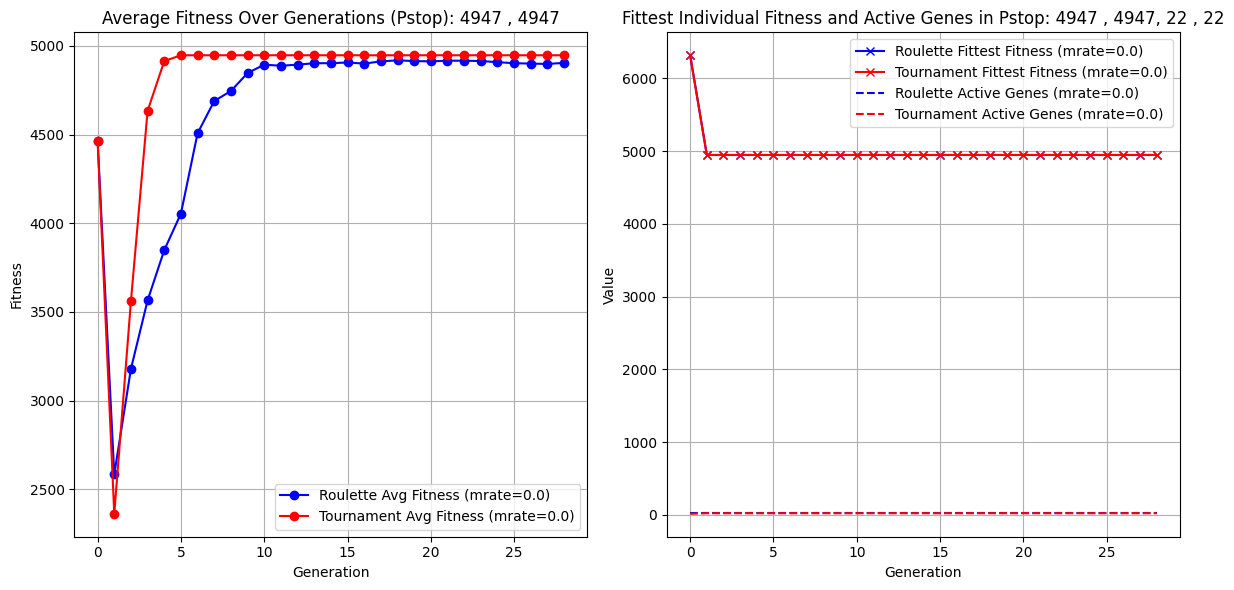

Best Overall Solution (Roulette): Fitness = 4947, Generation = 0
Best Overall Solution (Tournament): Fitness = 4947, Generation = 0

--- Mutation Rate: 0.05 ---
[1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0
 0 0 1 0 1 0 1 0 0 1 0 0 0]
684
[1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0
 0 0 1 0 1 0 1 0 0 1 0 0 0]
684


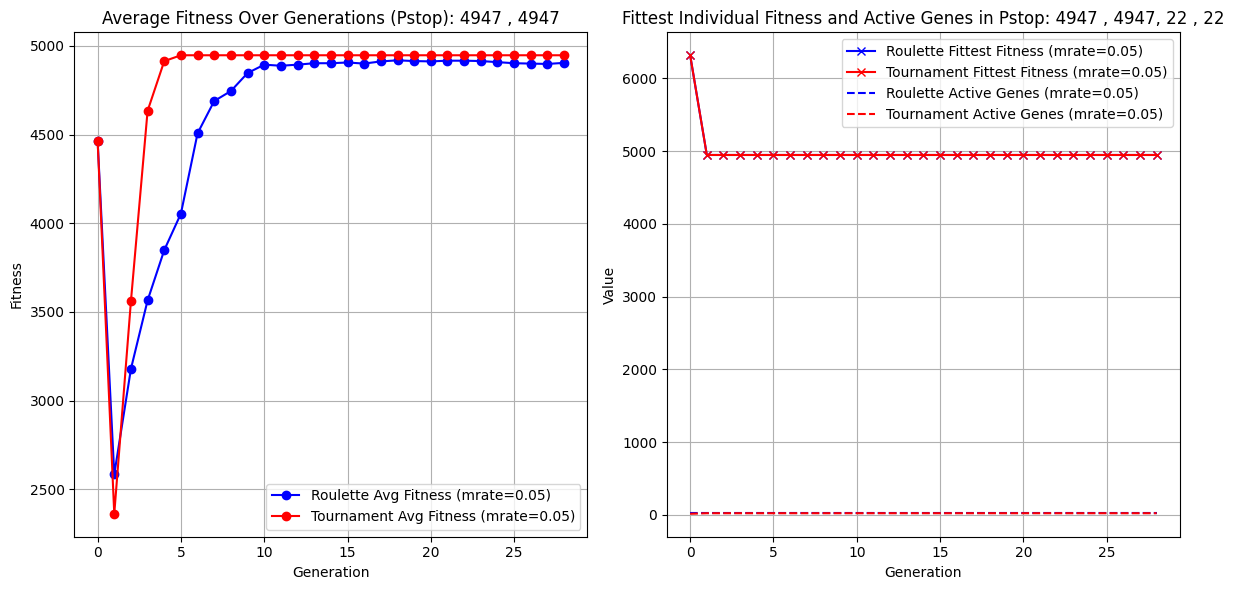

Best Overall Solution (Roulette): Fitness = 4947, Generation = 0
Best Overall Solution (Tournament): Fitness = 4947, Generation = 0

--- Mutation Rate: 0.1 ---
[1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0
 0 0 1 0 1 0 1 0 0 1 0 0 0]
684
[1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0
 0 0 1 0 1 0 1 0 0 1 0 0 0]
684


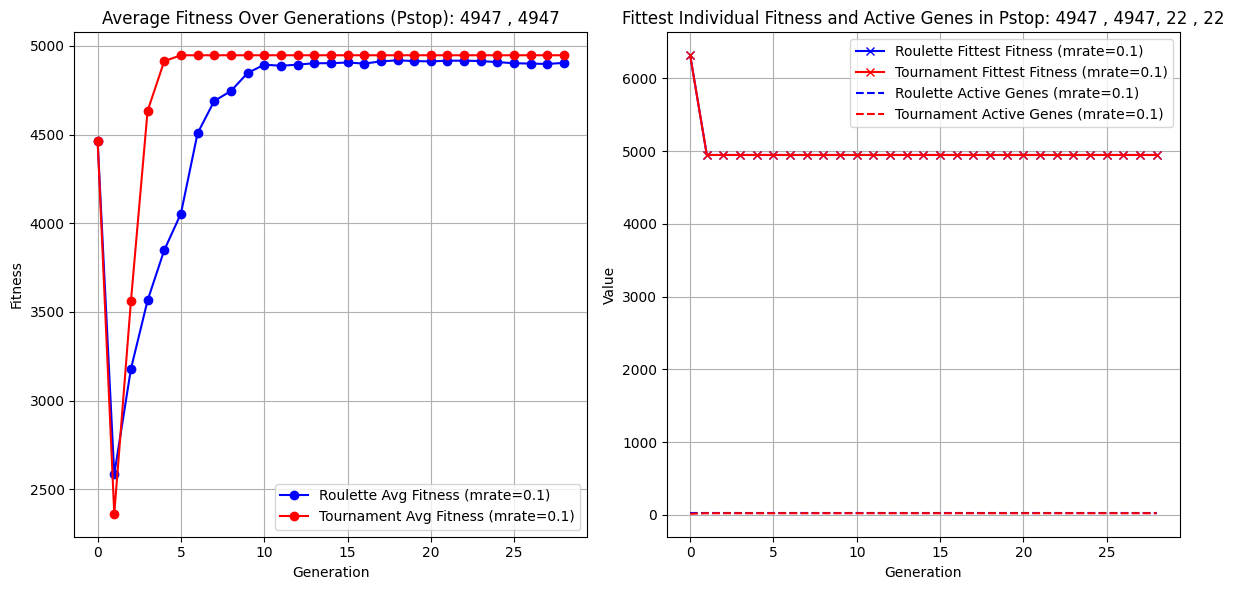

Best Overall Solution (Roulette): Fitness = 4947, Generation = 0
Best Overall Solution (Tournament): Fitness = 4947, Generation = 0

--- Mutation Rate: 0.15000000000000002 ---
[1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0
 0 0 1 0 1 0 1 0 0 1 0 0 0]
684
[1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0
 0 0 1 0 1 0 1 0 0 1 0 0 0]
684


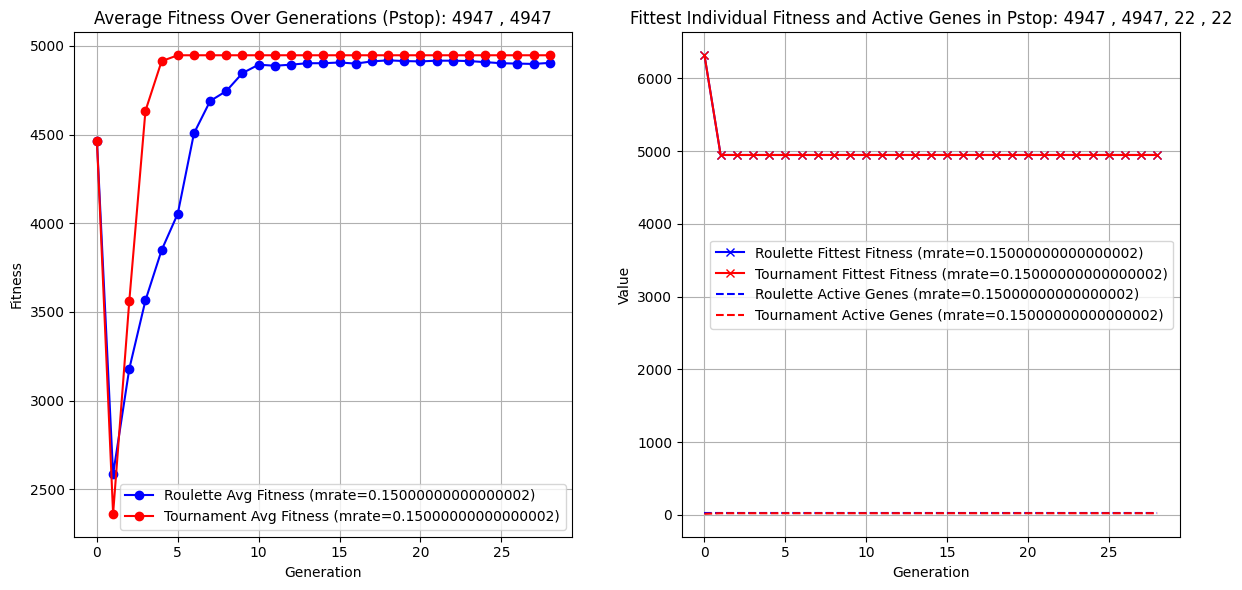

Best Overall Solution (Roulette): Fitness = 4947, Generation = 0
Best Overall Solution (Tournament): Fitness = 4947, Generation = 0

--- Mutation Rate: 0.2 ---
[1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0
 0 0 1 0 1 0 1 0 0 1 0 0 0]
684
[1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0
 0 0 1 0 1 0 1 0 0 1 0 0 0]
684


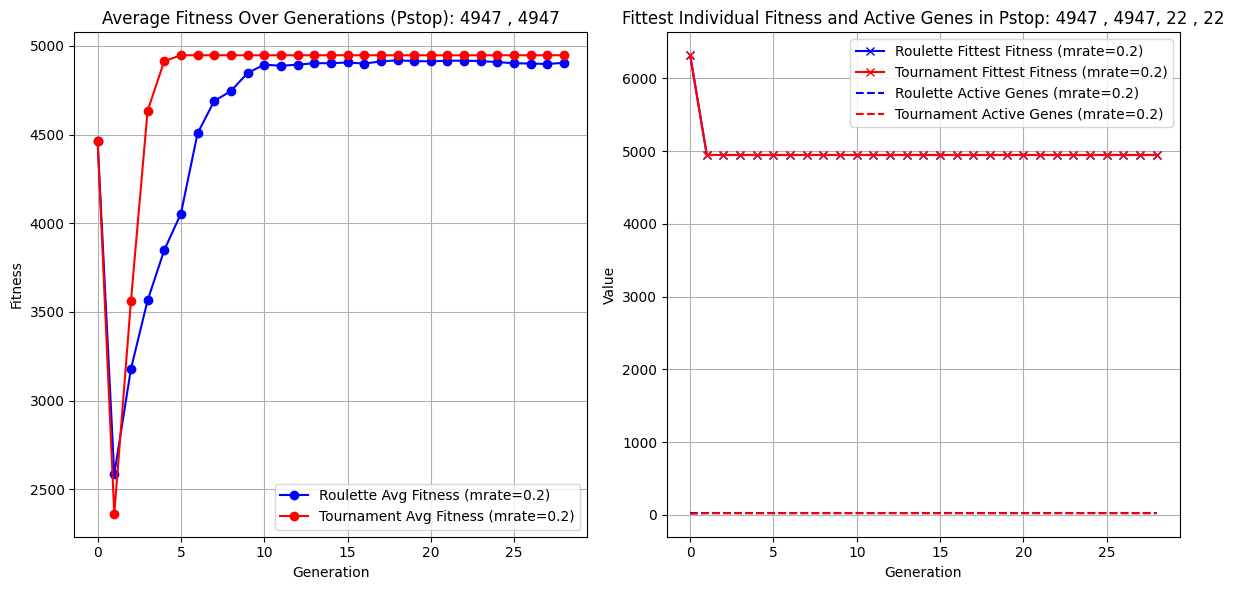

Best Overall Solution (Roulette): Fitness = 4947, Generation = 0
Best Overall Solution (Tournament): Fitness = 4947, Generation = 0

--- Best Solutions Summary ---
   MRate  Roulette Best Fit  Roulette Gen  Tournament Best Fit  Tournament Gen
0   0.00               4947             0                 4947               0
1   0.05               4947             0                 4947               0
2   0.10               4947             0                 4947               0
3   0.15               4947             0                 4947               0
4   0.20               4947             0                 4947               0

--- Mutation Rate: 0.0 ---
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2276
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

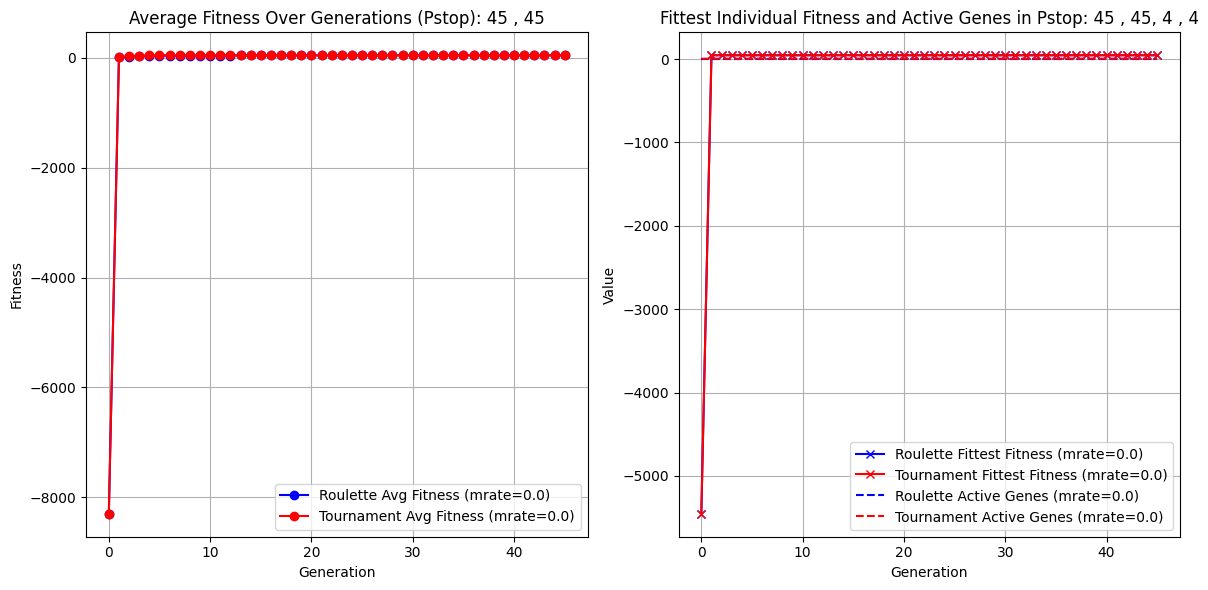

Best Overall Solution (Roulette): Fitness = 45, Generation = 0
Best Overall Solution (Tournament): Fitness = 45, Generation = 0

--- Mutation Rate: 0.05 ---
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2276
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2276


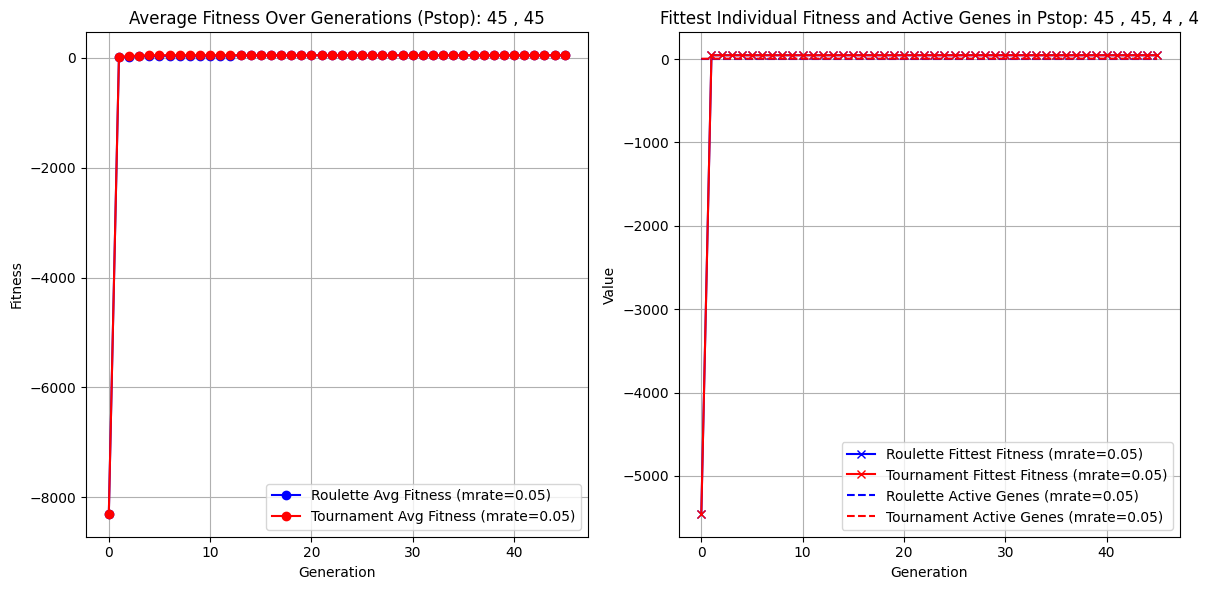

Best Overall Solution (Roulette): Fitness = 45, Generation = 0
Best Overall Solution (Tournament): Fitness = 45, Generation = 0

--- Mutation Rate: 0.1 ---
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2276
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2276


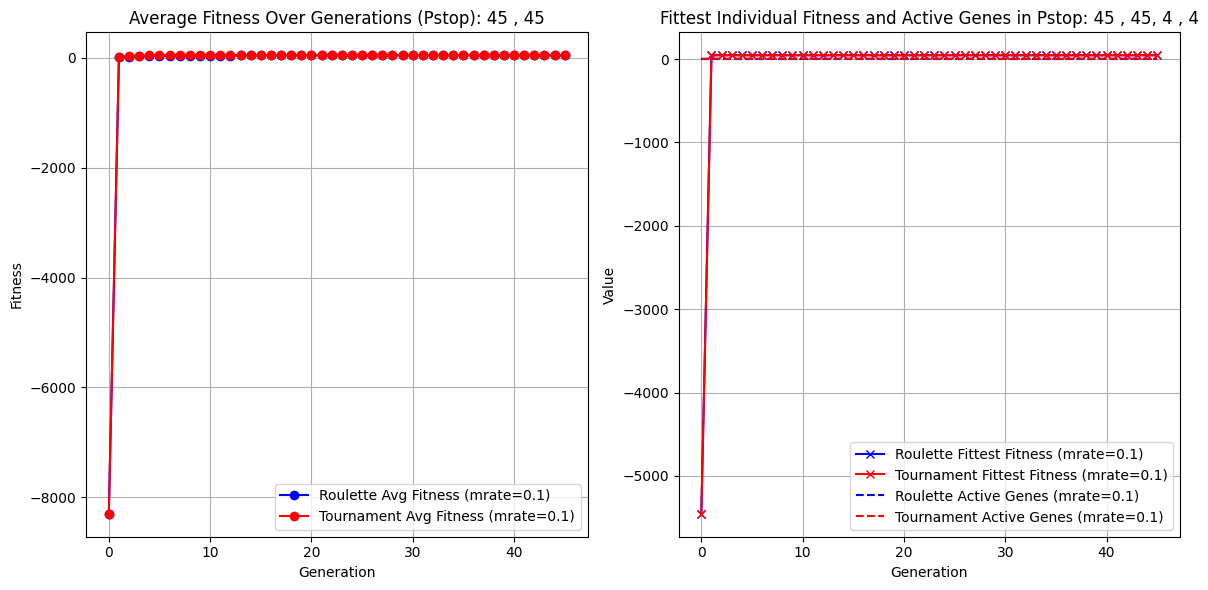

Best Overall Solution (Roulette): Fitness = 45, Generation = 0
Best Overall Solution (Tournament): Fitness = 45, Generation = 0

--- Mutation Rate: 0.15000000000000002 ---
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2276
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2276


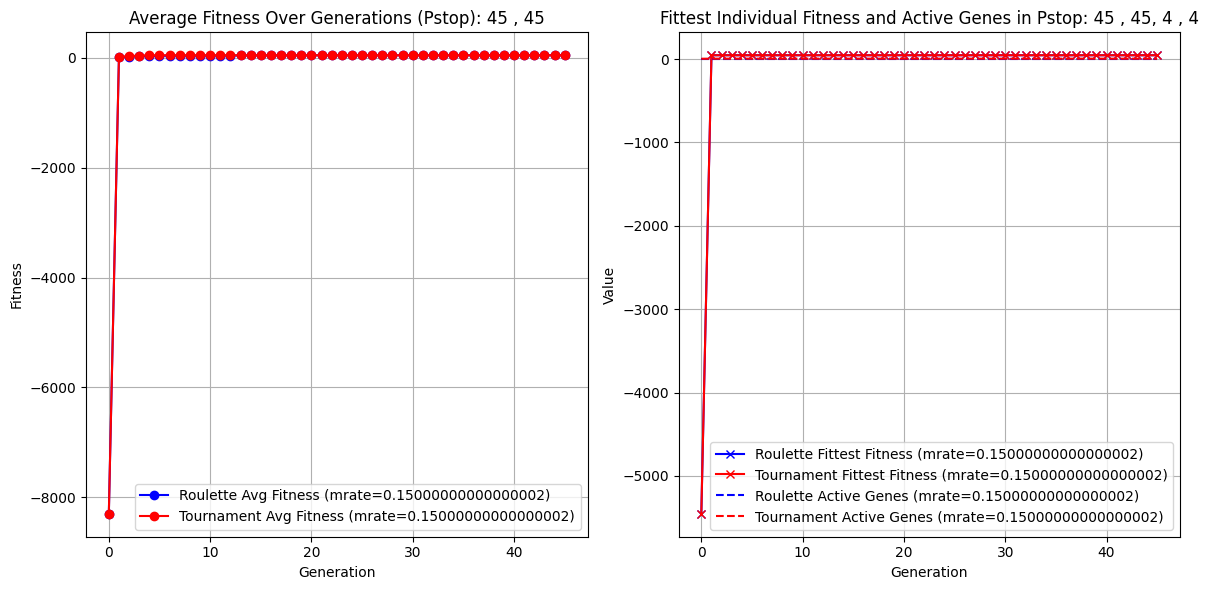

Best Overall Solution (Roulette): Fitness = 45, Generation = 0
Best Overall Solution (Tournament): Fitness = 45, Generation = 0

--- Mutation Rate: 0.2 ---
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2276
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2276


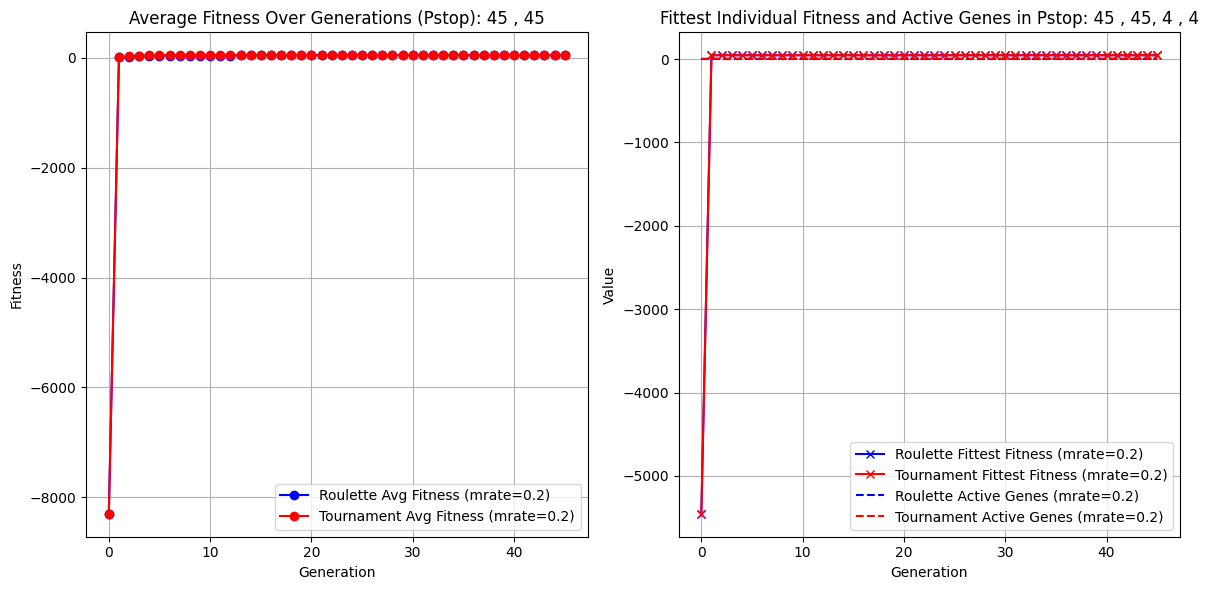

Best Overall Solution (Roulette): Fitness = 45, Generation = 0
Best Overall Solution (Tournament): Fitness = 45, Generation = 0

--- Best Solutions Summary ---
   MRate  Roulette Best Fit  Roulette Gen  Tournament Best Fit  Tournament Gen
0   0.00                 45             0                   45               0
1   0.05                 45             0                   45               0
2   0.10                 45             0                   45               0
3   0.15                 45             0                   45               0
4   0.20                 45             0                   45               0


In [23]:
config = "config_1.txt"
compare(config)
config = "config_2.txt"
compare(config)

**Problem 3 - Q3. Extra Credit - Implementation of custom stop function with custom fitness**

In [24]:
import numpy as np

def initpop(config, seed = None):
    if seed is not None:
        np.random.seed(seed)
    with open(config, 'r') as f:
        lines = f.readlines()
    if '=' in lines[0]:
        for line in lines:
            line = line.strip()
            if line.startswith("popsize"):
                pop = int(line.split('=')[1].strip())
            elif line.startswith("numitems"):
                n = int(line.split('=')[1].strip())
            elif line.startswith("maxgen"):
                stop = int(line.split('=')[1].strip())
            elif line.startswith("totweight"):
                W = int(line.split('=')[1].strip())
            elif line.startswith("Svalues"):
                continue
            elif line:
                weight, val = map(int, line.split())
                S.append((weight, val))
    else:
        pop, n, stop, W = map(int, [lines[i].strip() for i in range(4)])
        S = [tuple(map(int, line.strip().split())) for line in lines[4:]]
    g = 0
    p = np.random.randint(2, size = (pop, n))
    return p, W, S, g, stop

In [25]:
def repair(individual, S, W):
    totweight = sum([S[i][0] for i in range(len(individual)) if individual[i] == 1])
    if totweight > W:
        remove = [(S[i][0] / S[i][1], i) for i in range(len(S))]
        remove.sort()
        for ratio, i in remove:
            if individual[i] == 1:
                individual[i] = 0
                totweight -= S[i][0]
                if totweight <= W:
                    break
    return individual

def fitness(chromo, S, W):
    totweight = 0
    totval = 0
    for i, gene in enumerate(chromo):
        totweight += gene * S[i][0]
        totval += gene * S[i][1]
    if totweight > W:
        penalty = 0.5
        return totval - penalty * (totweight - W)
    return totval

def roulette(pop, fit):
    totfit = sum(fit)
    if totfit == 0:
        selected = np.random.choice(len(pop), size=2)
    else:
        prob = [f / totfit for f in fit]
        selected = np.random.choice(len(pop), size=2, p=prob)
    return pop[selected[0]], pop[selected[1]]

def tournament(pop, fit, size=3):
    selected = []
    for _ in range(2):
        parents = np.random.choice(len(pop), size, replace=False)
        best = max(parents, key=lambda i: fit[i])
        selected.append(pop[best])
    return selected[0], selected[1]

In [26]:
def crossover(p1, p2, crate=0.1):
    if np.random.rand() > crate:
        point = np.random.randint(1, len(p1) - 1)
        o1 = np.concatenate([p1[:point], p2[point:]])
        o2 = np.concatenate([p2[:point], p1[point:]])
    else:
        o1, o2 = np.copy(p1), np.copy(p2)
    return o1, o2

def mutation(chromo, mrate):
    for i in range(len(chromo)):
        if np.random.rand() < mrate:
            chromo[i] = 1 - chromo[i]
    return chromo

In [27]:
import matplotlib.pyplot as plt
import math

def stopc(fit, c):
    fitness = set(fit)
    common = max([fit.count(f) for f in fitness])
    return (common / len(fit)) >= c
def genalgo(config, criteria='roulette', mrate=0.1, c = 0.9):
    p, W, S, g, stop = initpop(config, seed=5342)
    n = len(S)
    avgfit = []
    fittest = []
    actgenes = []
    bestfit = -float('inf')
    bestsol = None
    bestgen = 0
    stable = 0
    for gen in range(0, stop):
        fitval = [fitness(i, S, W) for i in p]
        avgfitness = np.mean(fitval)
        avgfit.append(avgfitness)
        fitsol = p[np.argmax(fitval)]
        f = fitval[np.argmax(fitval)]
        actgen = np.sum(fitsol)
        if gen == 0:
            totweight = sum([S[i][0] * gene for i, gene in enumerate(fitsol)])
            if totweight <= W:
                fittest.append(f)
            else:
                f = 0
                fittest.append(f)
        else:
            fittest.append(f)
        actgenes.append(actgen)
        newpop = []
        if f > bestfit:
            bestfit = f
            bestsol = fitsol
            bestgen = gen
        if stopc(fitval, c):
            print(f"Population has converged at generation {gen}")
            break
        for _ in range(n // 2):
            if criteria == 'roulette':
                p1, p2 = roulette(p, fitval)
            else:
                p1, p2 = tournament(p, fitval)
            o1, o2 = crossover(p1, p2)
            o1 = mutation(o1, mrate)
            o2 = mutation(o2, mrate)
            o1 = repair(o1, S, W)
            o2 = repair(o2, S, W)
            newpop.append(o1)
            newpop.append(o2)
        p = np.array(newpop)
    fitPstop = [fitness(i, S, W) for i in p]
    avgfitPstop = np.mean(fitPstop)
    fitIDPstop = np.argmax(fitPstop)
    fitsolPstop = p[fitIDPstop]
    fPstop = fitPstop[fitIDPstop]
    actgenesPstop = np.sum(fitsolPstop)
    print(bestsol)
    totweight = sum([S[i][0] * gene for i, gene in enumerate(bestsol)])
    print(totweight)
    return (avgfit, fittest, actgenes, avgfitPstop, fPstop, actgenesPstop, bestsol, bestfit, bestgen)

import matplotlib.pyplot as plt

def sdisplay(rdata, tdata, mrate):
    genr = range(0, len(rdata[0]))
    gent = range(0, len(tdata[0]))
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(genr, rdata[0], label=f"Roulette Avg Fitness (mrate={mrate})", color='b', marker="o")
    plt.plot(genr, rdata[1], label=f"Roulette Fittest Fitness (mrate={mrate})", color='b', marker="x")
    plt.plot(genr, rdata[2], label=f"Roulette Active Genes (mrate={mrate})", color='b', linestyle='dashed')
    plt.xlabel("Generation")
    plt.ylabel("Value")
    plt.title(f"Roulette Selection (Avg Fitness, Fittest, Active Genes)")
    plt.legend()
    plt.grid(True)
    plt.subplot(1, 2, 2)
    plt.plot(gent, tdata[0], label=f"Tournament Avg Fitness (mrate={mrate})", color='r', marker="o")
    plt.plot(gent, tdata[1], label=f"Tournament Fittest Fitness (mrate={mrate})", color='r', marker="x")
    plt.plot(gent, tdata[2], label=f"Tournament Active Genes (mrate={mrate})", color='r', linestyle='dashed')
    plt.xlabel("Generation")
    plt.ylabel("Value")
    plt.title(f"Tournament Selection (Avg Fitness, Fittest, Active Genes)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


def compare(config):
    for mrate in np.arange(0, 0.25, 0.05):
        print(f"\n--- Mutation Rate: {mrate} ---")
        rdata = genalgo(config, criteria='roulette', mrate=mrate)
        tdata = genalgo(config, criteria='tournament', mrate=mrate)
        sdisplay(rdata, tdata, mrate)
        
        print(f"Best Overall Solution (Roulette): Fitness = {rdata[7]}, Generation = {rdata[8]}")
        print(f"Best Overall Solution (Tournament): Fitness = {tdata[7]}, Generation = {tdata[8]}")


--- Mutation Rate: 0.0 ---
[1 0 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 0 1 0 0 0 0 1 0]
815
Population has converged at generation 12
[1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 1 1 0
 0 1 1 0 1 1 1 1 1 0 0 0 1]
803


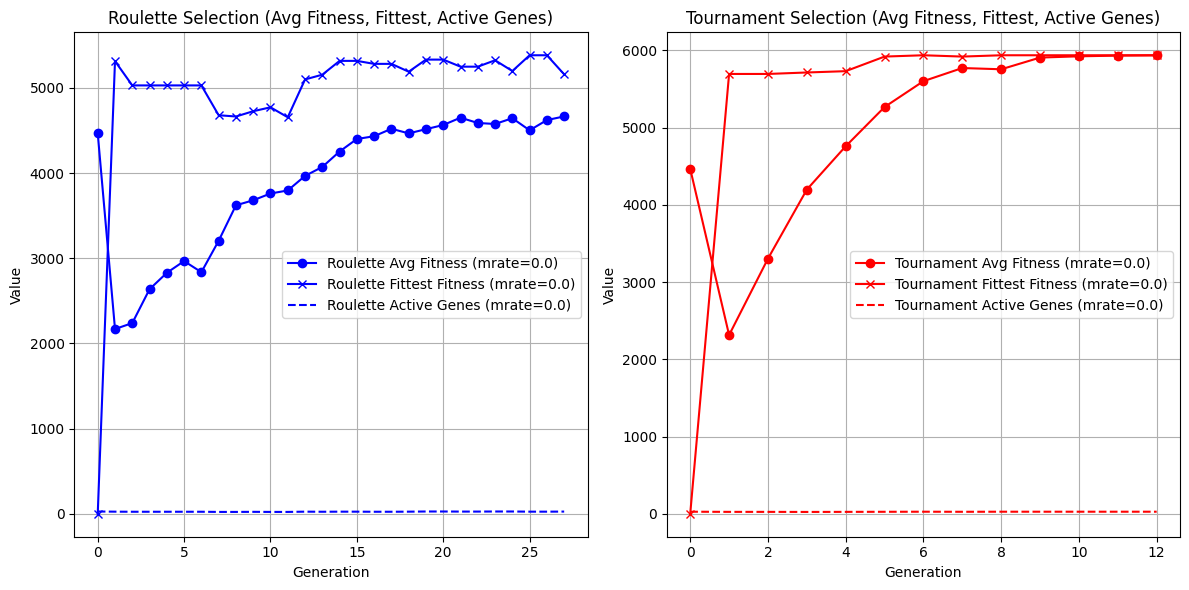

Best Overall Solution (Roulette): Fitness = 5383, Generation = 25
Best Overall Solution (Tournament): Fitness = 5937, Generation = 6

--- Mutation Rate: 0.05 ---
[1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 1]
799
[1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0
 0 0 1 0 0 1 0 1 0 1 1 1 1]
831


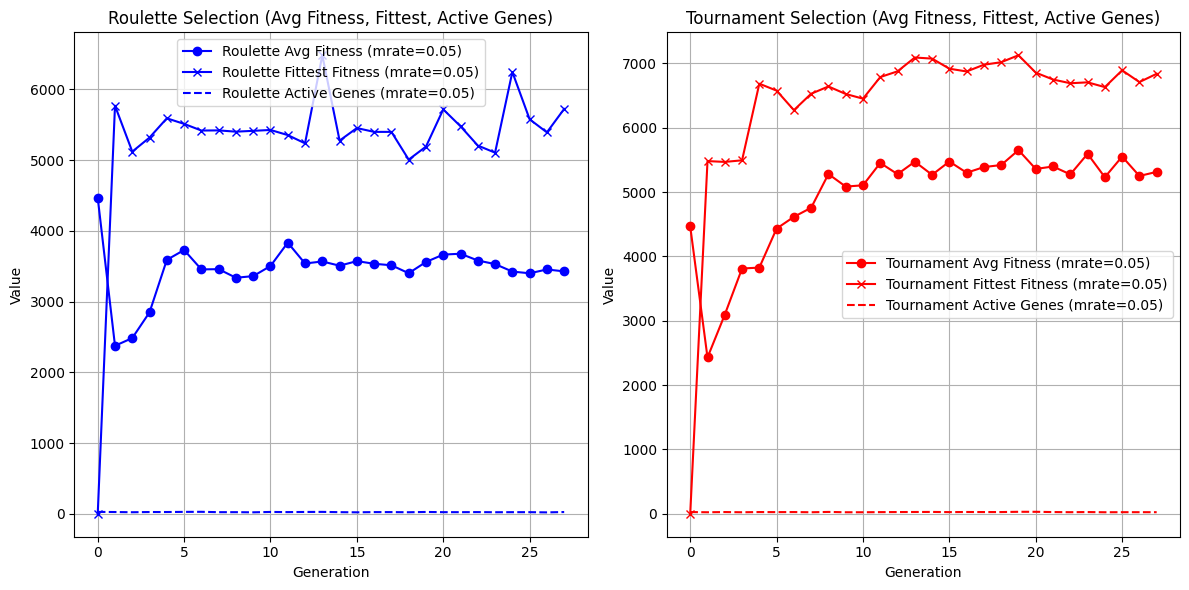

Best Overall Solution (Roulette): Fitness = 6481, Generation = 13
Best Overall Solution (Tournament): Fitness = 7128, Generation = 19

--- Mutation Rate: 0.1 ---
[1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 1 1 1
 0 0 1 0 0 1 0 1 0 0 1 0 1]
724
[1 1 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0
 1 1 0 0 1 0 0 0 0 1 1 0 1]
804


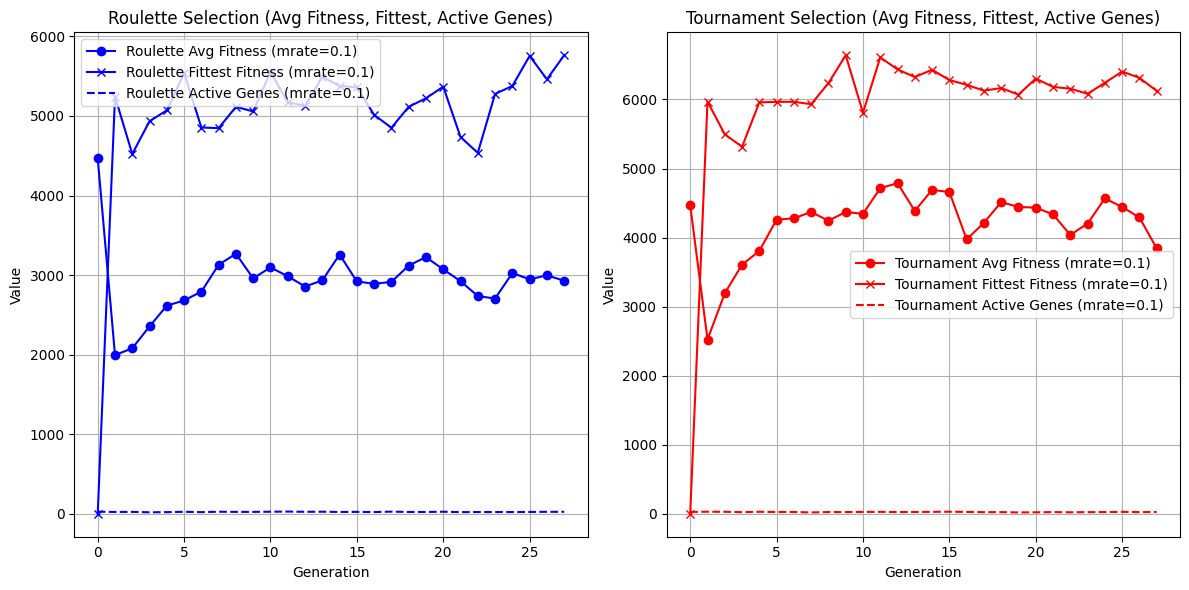

Best Overall Solution (Roulette): Fitness = 5763, Generation = 27
Best Overall Solution (Tournament): Fitness = 6640, Generation = 9

--- Mutation Rate: 0.15000000000000002 ---
[1 1 1 1 1 0 0 0 0 0 1 1 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1
 0 0 1 0 1 1 0 0 1 0 1 0 0]
802
[0 0 1 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1 0 1 1 0 0 0
 1 0 1 0 1 1 0 1 0 1 1 0 1]
846


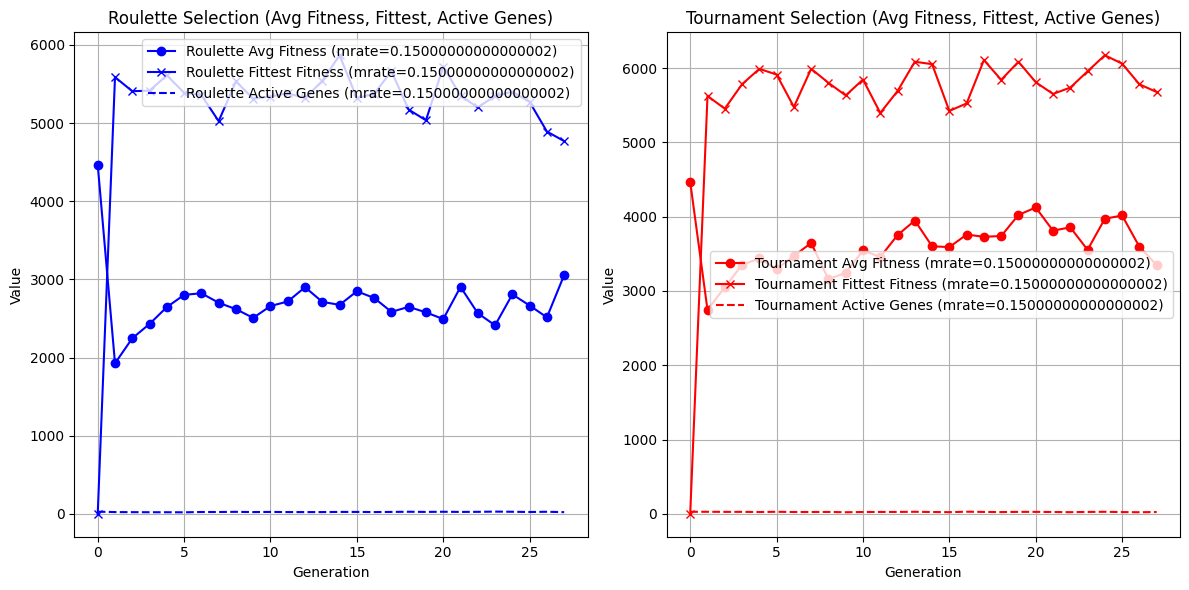

Best Overall Solution (Roulette): Fitness = 5868, Generation = 14
Best Overall Solution (Tournament): Fitness = 6174, Generation = 24

--- Mutation Rate: 0.2 ---
[1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 0 1 0 1 1]
807
[1 1 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0
 0 1 0 1 0 1 0 0 0 0 1 1 1]
809


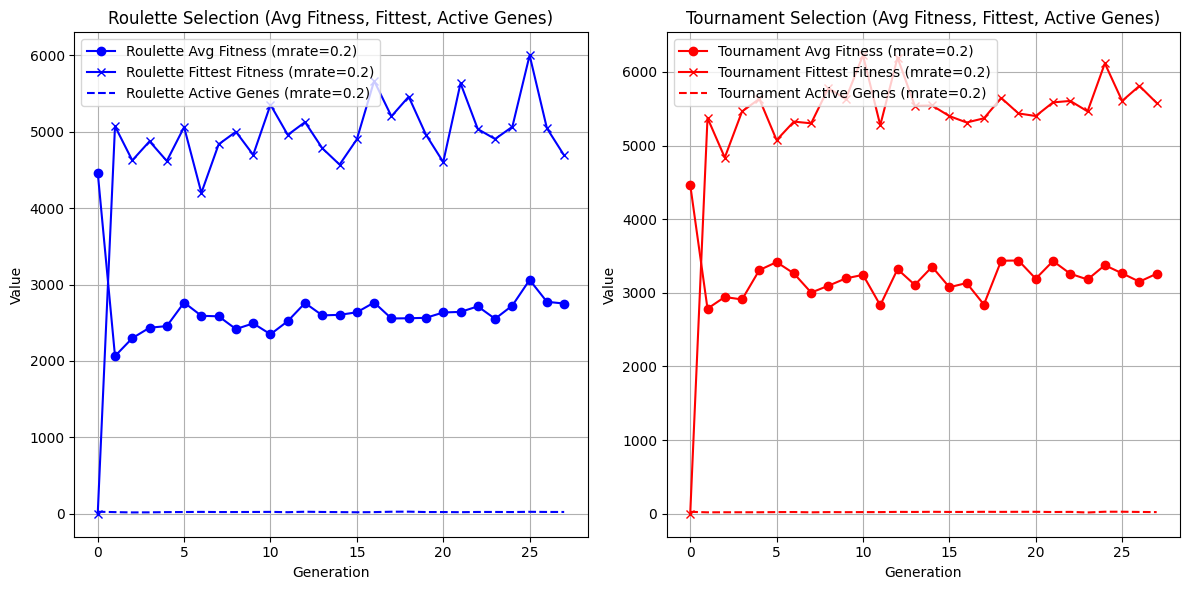

Best Overall Solution (Roulette): Fitness = 6001, Generation = 25
Best Overall Solution (Tournament): Fitness = 6226, Generation = 10

--- Mutation Rate: 0.0 ---
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
2302
Population has converged at generation 7
[0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
2294


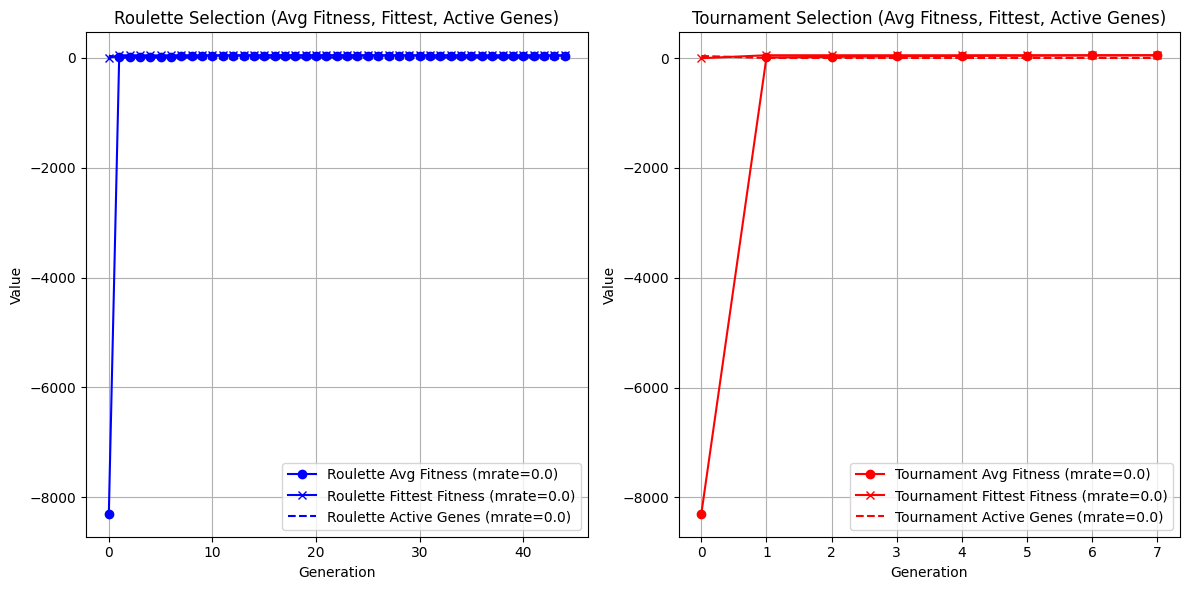

Best Overall Solution (Roulette): Fitness = 47, Generation = 6
Best Overall Solution (Tournament): Fitness = 53, Generation = 1

--- Mutation Rate: 0.05 ---
[0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0]
2055
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0]
1876


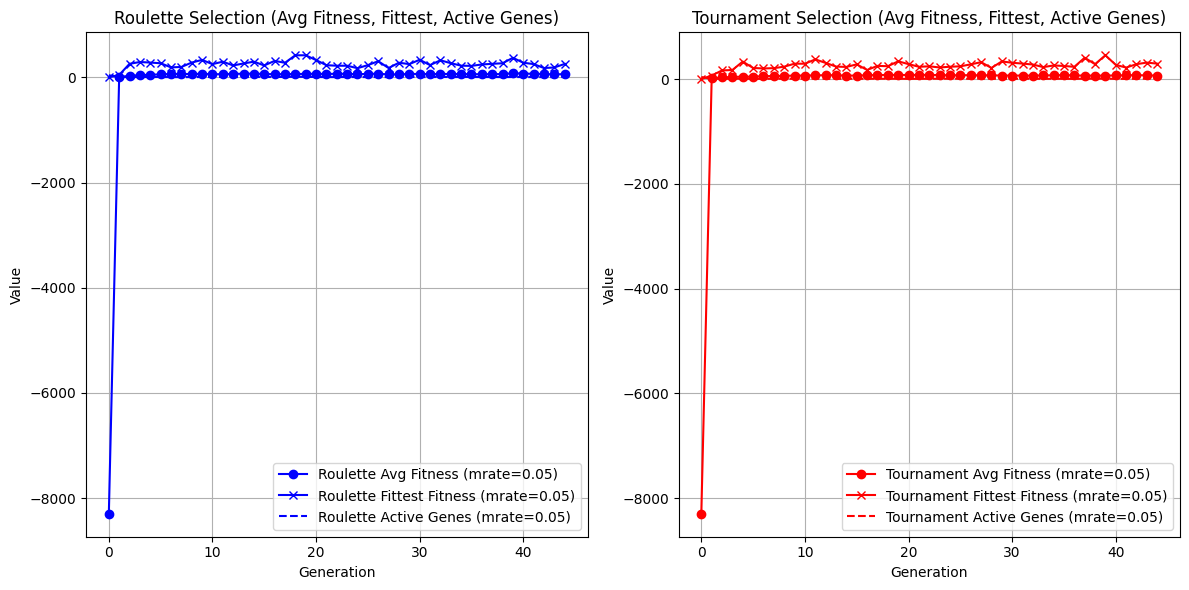

Best Overall Solution (Roulette): Fitness = 420, Generation = 18
Best Overall Solution (Tournament): Fitness = 455, Generation = 39

--- Mutation Rate: 0.1 ---
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
1717
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
2131


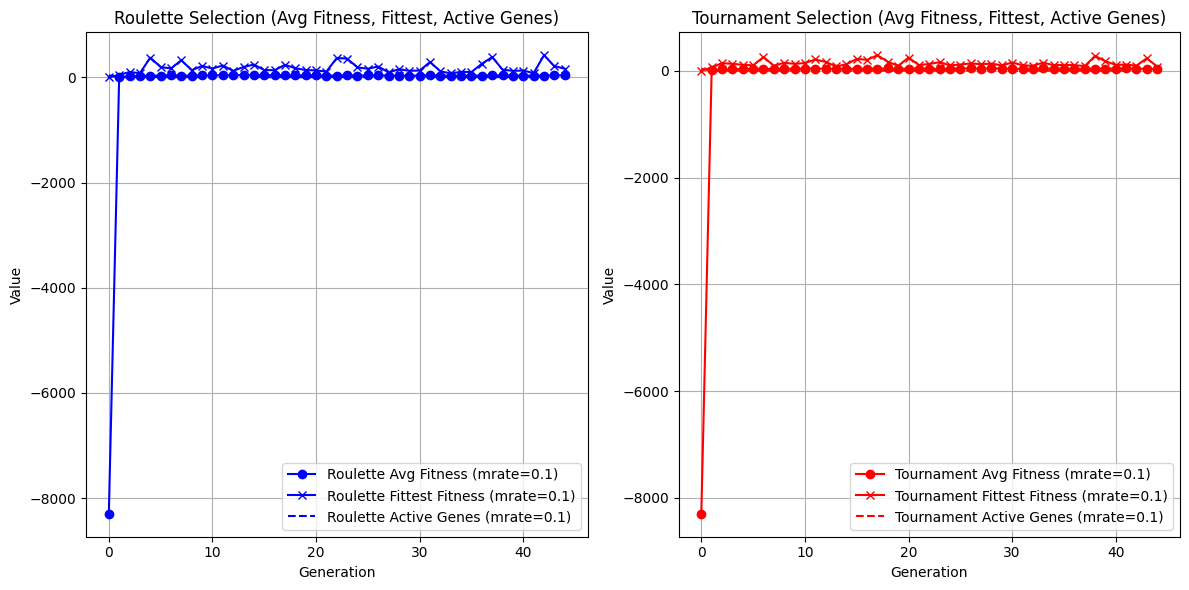

Best Overall Solution (Roulette): Fitness = 421, Generation = 42
Best Overall Solution (Tournament): Fitness = 292, Generation = 17

--- Mutation Rate: 0.15000000000000002 ---
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
2280
[1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2339


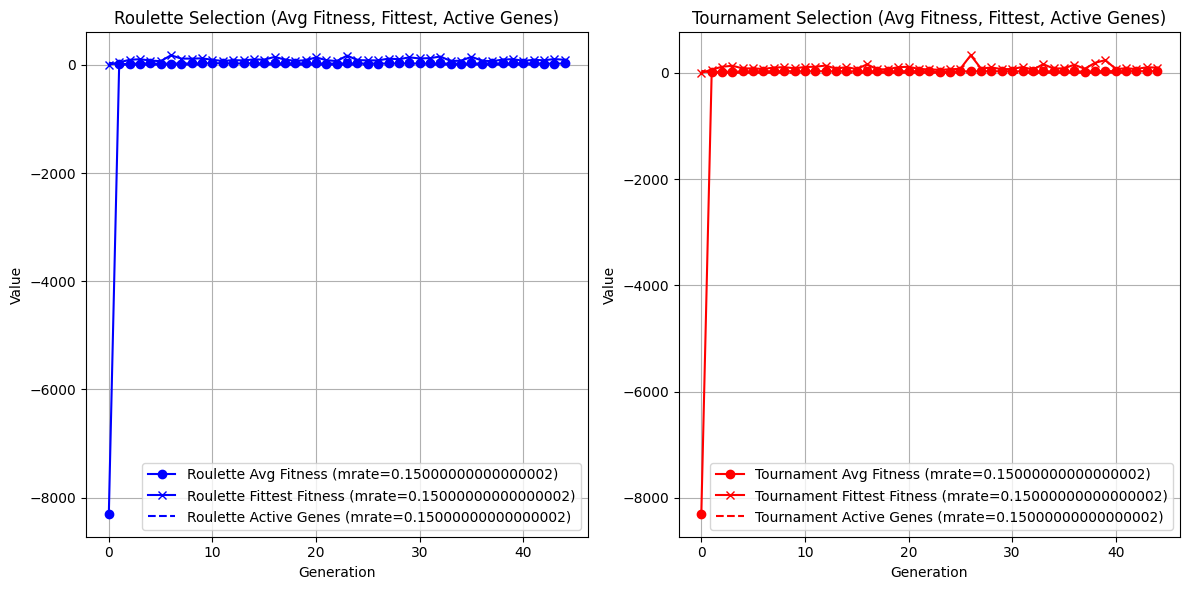

Best Overall Solution (Roulette): Fitness = 177, Generation = 6
Best Overall Solution (Tournament): Fitness = 333, Generation = 26

--- Mutation Rate: 0.2 ---
[0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
2331
[1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
2240


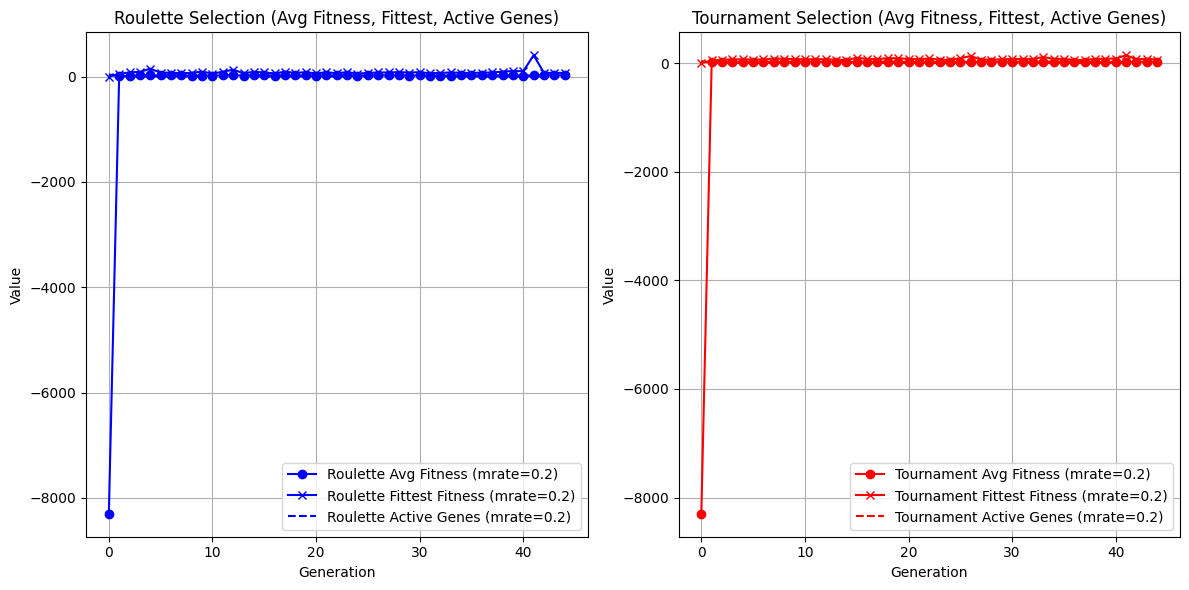

Best Overall Solution (Roulette): Fitness = 405, Generation = 41
Best Overall Solution (Tournament): Fitness = 146, Generation = 41


In [28]:
config = "config_1.txt"
compare(config)
config = "config_2.txt"
compare(config)

**Problem 1 - Q4. Exploring population sizes using trails**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def initpop(config, seed=None, popsize = 2):
    if seed is not None:
        np.random.seed(seed)
    S = []
    with open(config, 'r') as f:
        lines = f.readlines()
    
    if '=' in lines[0]:
        for line in lines:
            line = line.strip()
            if line.startswith("popsize"):
                pop = int(line.split('=')[1].strip())
            elif line.startswith("numitems"):
                n = int(line.split('=')[1].strip())
            elif line.startswith("maxgen"):
                stop = int(line.split('=')[1].strip())
            elif line.startswith("totweight"):
                W = int(line.split('=')[1].strip())
            elif line.startswith("Svalues"):
                continue
            elif line:
                weight, val = map(int, line.split())
                S.append((weight, val))
    else:
        pop, n, stop, W = map(int, [lines[i].strip() for i in range(4)])
        S = [tuple(map(int, line.strip().split())) for line in lines[4:]]
    
    g = 0
    p = np.random.randint(2, size=(popsize, n))
    return p, W, S, g, stop


In [2]:
def repair(individual, S, W):
    totweight = sum([S[i][0] for i in range(len(individual)) if individual[i] == 1])
    if totweight > W:
        remove = [(S[i][0] / S[i][1], i) for i in range(len(S))]
        remove.sort()
        for ratio, i in remove:
            if individual[i] == 1:
                individual[i] = 0
                totweight -= S[i][0]
                if totweight <= W:
                    break
    return individual

def fitness(chromo, S, W):
    totweight = 0
    totval = 0
    for i, gene in enumerate(chromo):
        totweight += gene * S[i][0]
        totval += gene * S[i][1]
    if totweight > W:
        penalty = 0.5
        return totval - penalty * (totweight - W)
    return totval

def roulette(pop, fit):
    totfit = sum(fit)
    if totfit == 0:
        selected = np.random.choice(len(pop), size=2)
    else:
        prob = [f / totfit for f in fit]
        selected = np.random.choice(len(pop), size=2, p=prob)
    return pop[selected[0]], pop[selected[1]]

def tournament(pop, fit, size=3):
    selected = []
    for _ in range(2):
        parents = np.random.choice(len(pop), size, replace=False)
        best = max(parents, key=lambda i: fit[i])
        selected.append(pop[best])
    return selected[0], selected[1]

In [3]:
def crossover(p1, p2, crate=0.1):
    if np.random.rand() > crate:
        point = np.random.randint(1, len(p1) - 1)
        o1 = np.concatenate([p1[:point], p2[point:]])
        o2 = np.concatenate([p2[:point], p1[point:]])
    else:
        o1, o2 = np.copy(p1), np.copy(p2)
    return o1, o2

def mutation(chromo, mrate):
    for i in range(len(chromo)):
        if np.random.rand() < mrate:
            chromo[i] = 1 - chromo[i]
    return chromo

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def stopc(fit, c):
    fitness = set(fit)
    common = max([fit.count(f) for f in fitness])
    return (common / len(fit)) >= c

def trails(config, pop, nruns=30, criteria='roulette', c=0.9):
    fval = []
    fweight = []
    final = []
    mrate = 0.1
    for run in range(nruns):
        seed = np.random.randint(1000)
        p, W, S, g, stop = initpop(config, seed, pop)
        n = len(S)
        bestfit = -float('inf')
        bestsol = None
        for gen in range(stop):
            fitval = [fitness(i, S, W) for i in p]
            fitID = np.argmax(fitval)
            fitsol = p[fitID]
            f = fitval[fitID]
            if f > bestfit:
                bestfit = f
                bestsol = fitsol
            if stopc(fitval, c):
                break
            newpop = []
            for _ in range(n // 2):
                if criteria == 'roulette':
                    p1, p2 = roulette(p, fitval)
                else:
                    p1, p2 = tournament(p, fitval)
                o1, o2 = crossover(p1, p2)
                o1 = mutation(o1, mrate)
                o2 = mutation(o2, mrate)
                o1 = repair(o1, S, W)
                o2 = repair(o2, S, W)
                newpop.append(o1)
                newpop.append(o2)
            p = np.array(newpop)
        finalfit = bestfit
        bestw = sum([S[i][0] for i, gene in enumerate(bestsol) if gene == 1])
        items = sum(bestsol)
        fval.append(finalfit)
        fweight.append(bestw)
        final.append(items)
    mv = np.mean(fval)
    std = np.std(fval)
    mw = np.mean(fweight)
    maxw = np.max(fweight)
    mitems = np.mean(final)
    print(f"Population Size: {pop}")
    print(f"Knapsack Value: {mv:.2f} ± {std:.2f}")
    print(f"Max Knapsack Weight: {maxw:.2f}")
    print(f"Number of Included Items: {round(mitems)}")
    return mv, std, mw, maxw, mitems

pops = [10, 20, 30, 50, 75, 100, 150, 200, 300, 500]
config = "config_1.txt"
results = []
for pop in pops:
    mv, std, mw, maxw, mitems = trails(config, pop=pop, nruns=30, criteria='roulette')
    results.append((pop, mv, std, mw, maxw, mitems))

print("\nResults for Different Population Sizes:")
print("Pop Size | Knapsack Value (Mean ± Std) | Max Weight | Mean Number of Items")
print("--------------------------------------------------------------------------")
for result in results:
    pop, mv, std, mw, maxw, mitems = result
    print(f"{pop:<8} | {mv:.2f} ± {std:.2f}           | {maxw:.2f}      | {round(mitems)}")

config = "config_1.txt"
results = []
for pop in pops:
    mv, std, mw, maxw, mitems = trails(config, pop=pop, nruns=30, criteria='tournament')
    results.append((pop, mv, std, mw, maxw, mitems))

print("\nResults for Different Population Sizes:")
print("Pop Size | Knapsack Value (Mean ± Std) | Max Weight | Mean Number of Items")
print("--------------------------------------------------------------------------")
for result in results:
    pop, mv, std, mw, maxw, mitems = result
    print(f"{pop:<8} | {mv:.2f} ± {std:.2f}           | {maxw:.2f}      | {round(mitems)}")
    

config = "config_2.txt"
results = []
for pop in pops:
    mv, std, mw, maxw, mitems = trails(config, pop=pop, nruns=30, criteria='roulette')
    results.append((pop, mv, std, mw, maxw, mitems))

print("\nResults for Different Population Sizes:")
print("Pop Size | Knapsack Value (Mean ± Std) | Max Weight | Mean Number of Items")
print("--------------------------------------------------------------------------")
for result in results:
    pop, mv, std, mw, maxw, mitems = result
    print(f"{pop:<8} | {mv:.2f} ± {std:.2f}           | {maxw:.2f}      | {round(mitems)}")

config = "config_2.txt"
results = []
for pop in pops:
    mv, std, mw, maxw, mitems = trails(config, pop=pop, nruns=30, criteria='tournament')
    results.append((pop, mv, std, mw, maxw, mitems))

print("\nResults for Different Population Sizes:")
print("Pop Size | Knapsack Value (Mean ± Std) | Max Weight | Mean Number of Items")
print("--------------------------------------------------------------------------")
for result in results:
    pop, mv, std, mw, maxw, mitems = result
    print(f"{pop:<8} | {mv:.2f} ± {std:.2f}           | {maxw:.2f}      | {round(mitems)}")

Population Size: 10
Knapsack Value: 6112.32 ± 226.85
Max Knapsack Weight: 1402.00
Number of Included Items: 27
Population Size: 20
Knapsack Value: 6033.05 ± 262.23
Max Knapsack Weight: 1409.00
Number of Included Items: 27
Population Size: 30
Knapsack Value: 6061.68 ± 166.92
Max Knapsack Weight: 1263.00
Number of Included Items: 30
Population Size: 50
Knapsack Value: 6242.43 ± 263.91
Max Knapsack Weight: 1435.00
Number of Included Items: 28
Population Size: 75
Knapsack Value: 6350.63 ± 322.10
Max Knapsack Weight: 1417.00
Number of Included Items: 31
Population Size: 100
Knapsack Value: 6309.00 ± 221.17
Max Knapsack Weight: 1481.00
Number of Included Items: 30
Population Size: 150
Knapsack Value: 6477.27 ± 210.16
Max Knapsack Weight: 1390.00
Number of Included Items: 31
Population Size: 200
Knapsack Value: 6470.48 ± 221.92
Max Knapsack Weight: 1343.00
Number of Included Items: 31
Population Size: 300
Knapsack Value: 6591.23 ± 194.92
Max Knapsack Weight: 1449.00
Number of Included Items: 

# Baseline

In [9]:
import numpy as np

def readconfig(config):
    with open(config, 'r') as file:
        lines = file.readlines()
    nitems = int(lines[1].strip())
    capacity = int(lines[2].strip())
    items = []
    for line in lines[4:]:
        weight, value = map(int, line.strip().split())
        items.append((weight, value))

    return nitems, capacity, items

def knapsackDP(S, W):
    n = len(S)
    dp = [[0 for _ in range(W + 1)] for _ in range(n + 1)]
    for i in range(1, n + 1):
        for w in range(1, W + 1):
            weight, value = S[i - 1]
            if weight <= w:
                dp[i][w] = max(dp[i - 1][w], dp[i - 1][w - weight] + value)
            else:
                dp[i][w] = dp[i - 1][w]
    w = W
    selected = [0] * n
    for i in range(n, 0, -1):
        if dp[i][w] != dp[i - 1][w]:
            selected[i - 1] = 1
            w -= S[i - 1][0]

    return dp[n][W], selected

config = "config_1.txt"
n, W, S = readconfig(config)
maxval, selected, = knapsackDP(S, W)
print(f"Max value using Greedy: {maxval}")
print(f"Selected items using Greedy: {selected}")

Max value using Greedy: 2499
Selected items using Greedy: [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]


In [10]:
def knapsackGA(config, criteria='roulette', mrate=0.1):
    p, W, S, g, stop = initpop(config, seed=5342)
    n = len(S)
    avgfit = []
    fittest = []
    actgenes = []
    bestfit = -float('inf')
    bestsol = None
    bestgen = 0

    for gen in range(stop):
        fitval = [fitness(i, S, W) for i in p]
        avgfitness = np.mean(fitval)
        avgfit.append(avgfitness)
        fitID = np.argmax(fitval)
        fitsol = p[fitID]
        f = fitval[fitID]
        actgen = np.sum(fitsol)
        fittest.append(f)
        actgenes.append(actgen)
        newpop = []
        for _ in range(n // 2):
            if criteria == 'roulette':
                p1, p2 = roulette(p, fitval)
            else:
                p1, p2 = tournament(p, fitval)
            o1, o2 = crossover(p1, p2)
            o1 = mutation(o1, mrate)
            o2 = mutation(o2, mrate)
            o1 = repair(o1, S, W)
            o2 = repair(o2, S, W)
            newpop.append(o1)
            newpop.append(o2)
        p = np.array(newpop)
    if f > bestfit:
            bestfit = f
            bestsol = fitsol
            bestgen = gen
    return bestsol, bestfit


--- Empirical Comparison ---
DP - Optimal Value: 2499, Time: 0.0000 seconds
GA - Best Value: 4911, Time: 0.2339 seconds


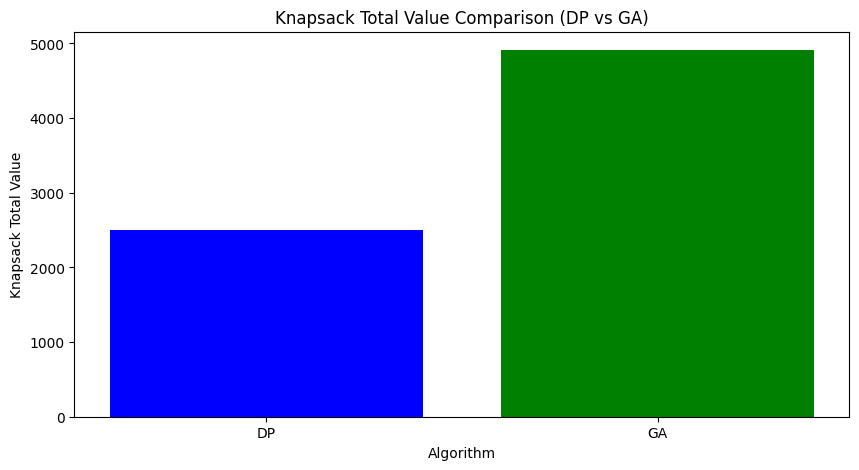

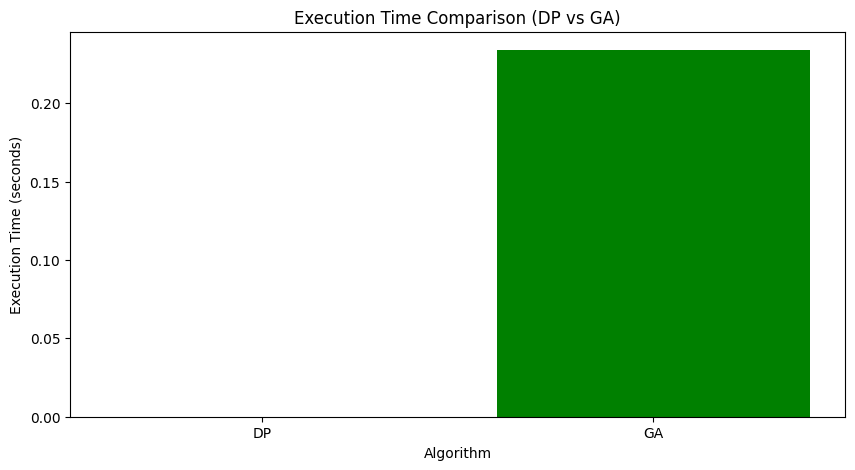


--- Empirical Comparison ---
DP - Optimal Value: 145, Time: 0.0008 seconds
GA - Best Value: 92, Time: 1.3149 seconds


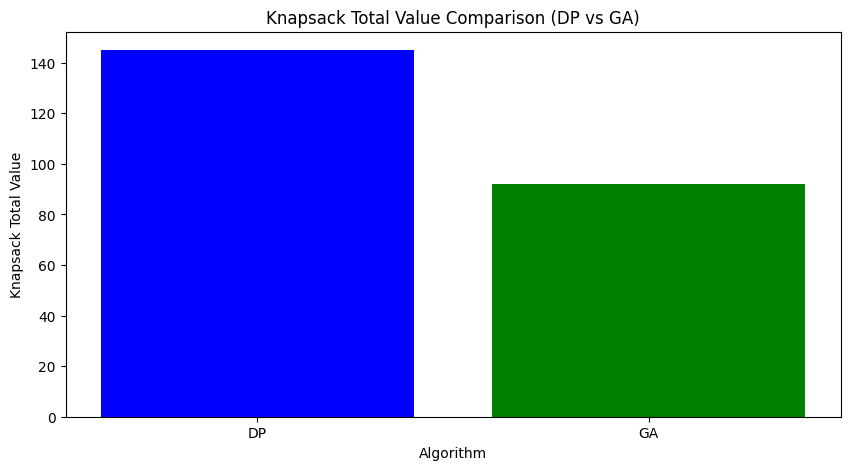

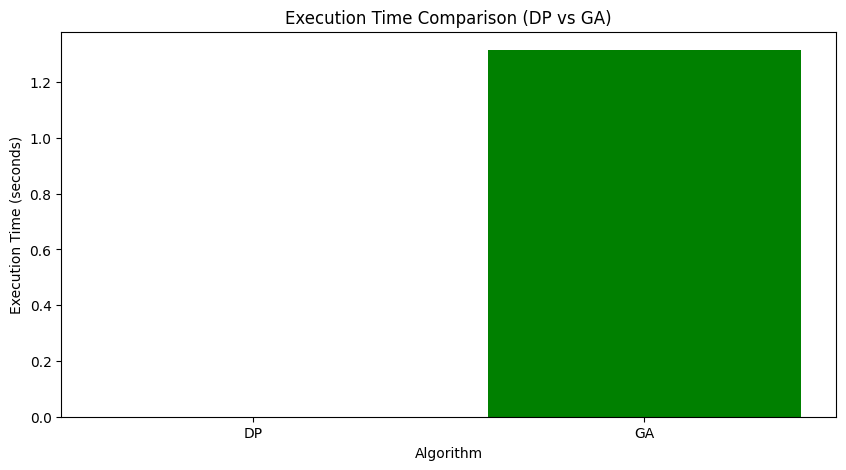

In [11]:
import time
def ecomparison(config):
    n, W, S = readconfig(config)
    startdp = time.time()
    dpval, selected = knapsackDP(S, W)
    enddp = time.time()
    dptime = enddp - startdp

    startga = time.time()
    bestsol, gafit = knapsackGA(config)
    endga = time.time()
    gatime = endga - startga

    print("\n--- Empirical Comparison ---")
    print(f"DP - Optimal Value: {dpval}, Time: {dptime:.4f} seconds")
    print(f"GA - Best Value: {gafit}, Time: {gatime:.4f} seconds")

    algorithms = ['DP', 'GA']
    values = [dpval, gafit]
    times = [dptime, gatime]

    plt.figure(figsize=(10, 5))
    plt.bar(algorithms, values, color=['blue', 'green'])
    plt.xlabel("Algorithm")
    plt.ylabel("Knapsack Total Value")
    plt.title("Knapsack Total Value Comparison (DP vs GA)")
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.bar(algorithms, times, color=['blue', 'green'])
    plt.xlabel("Algorithm")
    plt.ylabel("Execution Time (seconds)")
    plt.title("Execution Time Comparison (DP vs GA)")
    plt.show()

config = "config_1.txt"
ecomparison(config)
config = "config_2.txt"
ecomparison(config)